# Compute gcorr diseases and phenotypes (ldscr)
###### Created 03/08/2022
###### Last modification 11/01/2023

In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import glob, os
from os import listdir
from os.path import isfile, join
from datetime import datetime

#### Page with the ldsr files:
#### https://nealelab.github.io/UKBB_ldsc/downloads.html#ldsc_sumstat_files

In [33]:
### Copied from config

MAIN_LABELS='mean_angle_taa,mean_angle_tva,tau1_vein,tau1_artery,ratio_AV_DF,eq_CRAE,ratio_CRAE_CRVE,D_A_std,D_V_std,eq_CRVE,ratio_VD,VD_orig_artery,bifurcations,VD_orig_vein,medianDiameter_artery,medianDiameter_vein,ratio_AV_medianDiameter'
MAIN_NAMES='A temporal angle,V temporal angle,V tortuosity,A tortuosity,ratio tortuosity,A central retinal eq,ratio central retinal eq,A std diameter,V std diameter,V central retinal eq,ratio vascular density,A vascular density,bifurcations,V vascular density,A median diameter,V median diameter,ratio median diameter'
traits_phenos = list(MAIN_LABELS.split(","))
traits_phenos_new = list(MAIN_NAMES.split(","))
 
only_continuos = False # True

path = '/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/gwas/gcorr_diseases/'


### Read from csv
file_info_name='pheno_diseases_info.csv'

df_inf_csv = pd.read_csv('~/retina-phenotypes/complementary/'+ file_info_name)
print('len(df_inf_csv):', len(df_inf_csv))
df_inf_filt =  df_inf_csv[df_inf_csv['lscr_analysis'] == 'TRUE']
print('len(df_inf_filt):', len(df_inf_filt))

if only_continuos == True:
    df_inf_filt =  df_inf_csv[df_inf_csv['dtype'] == 'con']
    print('len(df_inf_filt):', len(df_inf_filt))
traits_all = list(df_inf_filt['datafield'].values)
traits_all_new = list(df_inf_filt['final_name'].values)



len(df_inf_csv): 89
len(df_inf_filt): 23


In [34]:
#print(df_inf_filt['final_name'] , df_inf_filt['N_cases_ldsr'])

In [35]:
# path This we can read from config
def try_to_compute_all(traits_all):
    
    save_path = path
    l_diseases_all=[]
    for trait in traits_all:
        #print(trait)
        for file in os.listdir(path):
            #print(file, '\n')
            if file.startswith(trait):
                if (file.endswith('.tsv.bgz'))  or (file.endswith('.tsv')):
                    print('PHENO', trait)
                    print(file, '\n')
                    #df_ss = pd.read_csv(path + file,  nrows=1, sep='\t')
                    #print(df_ss['N'].iloc[0])
                    #print(file)
                    data={
                        'pheno':  trait,
                        'file':  file
                        #,'N': df_ss['N'].iloc[0],
                        }
                    l_diseases_all.append(data)

    df_diseases_all =pd.DataFrame(l_diseases_all)
    #file_name_end = '_irnt.gwas.imputed_v3.both_sexes.tsv'

    l_traits_file=[]
    for trait in traits_phenos:
        file_pheno= trait + '__munged.sumstats.gz'
        l_traits_file.append(file_pheno)

    traits_files = l_traits_file + list(df_diseases_all['file'])
    traits_names = traits_phenos + list(df_diseases_all['pheno'])
    print(len(traits_files), len(l_traits_file), len(list(df_diseases_all['file'])))
    return df_diseases_all

df_diseases_all = try_to_compute_all(traits_all)

PHENO 4079
4079_irnt.ldsc.imputed_v3.both_sexes.tsv 

PHENO 4080
4080_irnt.ldsc.imputed_v3.both_sexes.tsv 

PHENO 6150_4
6150_4.ldsc.imputed_v3.both_sexes.tsv 

PHENO 102
102_irnt.ldsc.imputed_v3.both_sexes.tsv 

PHENO 21021
21021_irnt.ldsc.imputed_v3.both_sexes.tsv 

PHENO 30760
30760_irnt.imputed_v3.ldsc.both_sexes.tsv 

PHENO 30780
30780_irnt.imputed_v3.ldsc.both_sexes.tsv 

PHENO 30870
30870_irnt.imputed_v3.ldsc.both_sexes.tsv 

PHENO 30750
30750_irnt.imputed_v3.ldsc.both_sexes.tsv 

PHENO 1558
1558.ldsc.imputed_v3.both_sexes.tsv 

PHENO 20116_0
20116_0.ldsc.imputed_v3.both_sexes.tsv 

PHENO 20116_1
20116_1.ldsc.imputed_v3.both_sexes.tsv 

PHENO 20116_2
20116_2.ldsc.imputed_v3.both_sexes.tsv 

PHENO 21001
21001_irnt.ldsc.imputed_v3.both_sexes.tsv 

PHENO 6148_2
6148_2.ldsc.imputed_v3.both_sexes.tsv 

PHENO 6148_4
6148_4.ldsc.imputed_v3.both_sexes.tsv 

PHENO 6147_2
6147_2.imputed_v3.ldsc.both_sexes.v2.tsv 

PHENO 6147_1
6147_1.imputed_v3.ldsc.both_sexes.v2.tsv 

PHENO 2443
2443.lds

In [36]:
#df_diseases_all= df_diseases_all.drop_duplicates(subset='pheno')
df_diseases_all

,pheno,file
0,4079,4079_irnt.ldsc.imputed_v3.both_sexes.tsv
1,4080,4080_irnt.ldsc.imputed_v3.both_sexes.tsv
2,6150_4,6150_4.ldsc.imputed_v3.both_sexes.tsv
3,102,102_irnt.ldsc.imputed_v3.both_sexes.tsv
4,21021,21021_irnt.ldsc.imputed_v3.both_sexes.tsv
5,30760,30760_irnt.imputed_v3.ldsc.both_sexes.tsv
6,30780,30780_irnt.imputed_v3.ldsc.both_sexes.tsv
7,30870,30870_irnt.imputed_v3.ldsc.both_sexes.tsv
8,30750,30750_irnt.imputed_v3.ldsc.both_sexes.tsv
9,1558,1558.ldsc.imputed_v3.both_sexes.tsv


In [37]:

#datafields_irnt = [ dat + "_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz" for dat in traits_reduced]
datafields_irnt = [ dat for dat in df_diseases_all['file']]
datafields_pheno = [ dat + "__munged.sumstats.gz" for dat in traits_phenos]
diseasess_tra_aux = [ dat for dat in df_diseases_all['pheno']]

traits_col_index = traits_phenos + diseasess_tra_aux
traits_names = datafields_pheno + datafields_irnt

In [38]:
### IMPORTANT: If you have not same file go back to diseases_traits and comment 
### the phenotypes that are missing

In [39]:
# filter the files names containing 2 traits
def read_ldsr(traits_files, traits_col_index):
    df_cov=pd.DataFrame(columns =traits_col_index, index=traits_col_index)
    df_corr=pd.DataFrame(columns =traits_col_index, index=traits_col_index)
    df_std=pd.DataFrame(columns =traits_col_index, index=traits_col_index)
    #2976_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz_4700_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz.log
    #2976_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz_D_A_std__munged.sumstats.gz.log

    for i  in range(len(traits_files)):
        for j in range(len(traits_files)):
            h2 = []
            file_both_name = traits_files[i]+'_'+ traits_files[j]+'.log'
            dir_traitsfile = path+file_both_name
            #print(dir_traitsfile)
            with open(dir_traitsfile) as fp:
                #print(fp)
                #print(traits_files[i],traits_files[j])
                Lines = fp.readlines()
                for line in Lines:
                    #print(line)
                    split = line.split()
                    if('gencov:' in split):
                        df_cov.iloc[i][j] = round(float(split[ split.index('gencov:') +1 ]),2)
                        df_cov.iloc[j][i] = round(float(split[ split.index('gencov:') +1 ]),2)
                        #print(split)
                    if('Correlation:' in split):
                        #print(line)
                        #print(split)
                        df_corr.iloc[i][j] = round(float(split[ split.index('Correlation:') +1 ]),2)
                        df_corr.iloc[j][i] = round(float(split[ split.index('Correlation:') +1 ]),2)
                        #print(array2)
                        #print(split )
                        #print( df_corr.iloc[i][j], float(split[ split.index('Correlation:') +1 ]) )
                        #print( df_corr.iloc[j][i], float(split[ split.index('Correlation:') +1 ]))
                        df_std.iloc[i][j] = split[3]
                        df_std.iloc[j][i] = split[3]
    return df_cov, df_corr, df_std

df_cov, df_corr, df_std2 = read_ldsr(traits_names, traits_col_index)     

In [40]:
def rename_col_index(df, l_phenos_old, l_phenos_new, l_diseases_old, l_diseases_new):
      df.rename(columns=dict(zip(l_diseases_old, l_diseases_new)), inplace=True)
      df.rename(index=dict(zip(l_phenos_old, l_phenos_new)), inplace=True)
      return df

def detele_col_index(df, l_phenos_old, l_phenos_new, l_diseases_old, l_diseases_new):
      #print(l_phenos_old, l_phenos_new)
      df=df.drop(columns=l_phenos_old)
      #print(df.index)
      #print(l_diseases_old)
      #df=df.drop(index=l_diseases_old)
      df = df[df.index.isin(l_phenos_old)]
      #print(df)
      df= rename_col_index(df, l_phenos_old, l_phenos_new, l_diseases_old, l_diseases_new)    
      return df

df_corr_simpl = detele_col_index(df_corr, traits_phenos, traits_phenos_new, traits_all, traits_all_new)
df_std_simpl = detele_col_index(df_std2,  traits_phenos, traits_phenos_new, traits_all,  traits_all_new)

#df_std_simpl =  df_std2 #.astype(float)
#df_corr_simpl = df_corr.astype(float)

In [41]:
#df_std_simpl.drop_duplicates(inplace=True)
df_std_simpl = df_std_simpl.loc[:,~df_std_simpl.columns.duplicated()].copy()
df_std_simpl.columns

Index(['DBP', 'SBP', 'High blood pressure *', 'PR', 'Pulse wave ASI',
       'HDL cholesterol', 'LDL direct', 'Triglycerides', 'HbA1c',
       'Alcohol intake frequency', 'Smoking status: Never *',
       'Smoking status: Previous *', 'Smoking status: current *', 'BMI',
       'Glaucoma *', 'Cataract *', 'Glasses hypermetropia *',
       'Glasses myopia *', 'Diabetes *', 'Angina *', 'Heart attack *',
       'Stroke *', 'Coronary atherosclerosis *'],
      dtype='object')

In [42]:
#df_std_simpl = df_std_simpl.astype(str)
for col in df_std_simpl.columns:
    #print(col)
    #print(df_std_simpl[col].head(3))
    df_std_simpl[col] = df_std_simpl[col].str.replace("(", "", regex=True)
    df_std_simpl[col] = df_std_simpl[col].str.replace(")", "", regex=True)

df_std_simpl=df_std_simpl.astype(float)
df_std_simpl=df_std_simpl.round(2)
df_std_simpl.dtypes

DBP                           float64
SBP                           float64
High blood pressure *         float64
PR                            float64
Pulse wave ASI                float64
HDL cholesterol               float64
LDL direct                    float64
Triglycerides                 float64
HbA1c                         float64
Alcohol intake frequency      float64
Smoking status: Never *       float64
Smoking status: Previous *    float64
Smoking status: current *     float64
BMI                           float64
Glaucoma *                    float64
Cataract *                    float64
Glasses hypermetropia *       float64
Glasses myopia *              float64
Diabetes *                    float64
Angina *                      float64
Heart attack *                float64
Stroke *                      float64
Coronary atherosclerosis *    float64
dtype: object

In [43]:
table_plot='False'

if table_plot=='True':
    #print(df_reducida.columns, df_std.columns)
    df = df_corr_simpl.astype(str) + ' (' + df_std_simpl.astype(str)+ ')'



    df_corr_simpl_aux = df_corr_simpl.copy()
    df_corr_simpl_aux = df_corr_simpl_aux.astype(float)

    rcolors = plt.cm.Greys(np.full(len(df.index), 0.15))
    ccolors = plt.cm.Greys(np.full(len(df.columns), 0.15))
    fig, ax = plt.subplots()
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')
    #create table
    table = ax.table(cellText=df.values, 
                    #rowColours=rcolors,
                    colLabels=df.columns, 
                    rowLabels=df.index,
                    #colColours=ccolors,
                    rowLoc='center',
                    colLoc='center',
                    cellLoc='center',
                    cellColours=plt.cm.viridis(df_corr_simpl_aux.values, alpha=0.5),
                    loc='center',
                    fontsize=16,
                    colWidths=[0.15 for x in df.columns])


    table.auto_set_font_size(False)
    table.set_fontsize(16)
    table.scale(3.7, 3.5) # make table a little bit larger
    fig.tight_layout()
    #plt.show()
    #fig.savefig(save_dir+str(DATE)+'_'+'ventile'+str(ventile_num)+'_diseases_gcorr.pdf', bbox_inches='tight',dpi=250)


In [44]:
#len(df_corr_simpl)
# set(traits_all)-set(df_diseases_all['pheno'])
# set(traits_all_new)-set(df_corr_simpl.columns)
# len(traits_all_new)

# Figure genetic correlation with diseases

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 [Text(0.5, 0, 'A temporal angle'),
  Text(1.5, 0, 'V temporal angle'),
  Text(2.5, 0, 'V tortuosity'),
  Text(3.5, 0, 'A tortuosity'),
  Text(4.5, 0, 'ratio tortuosity'),
  Text(5.5, 0, 'A central retinal eq'),
  Text(6.5, 0, 'ratio central retinal eq'),
  Text(7.5, 0, 'A std diameter'),
  Text(8.5, 0, 'V std diameter'),
  Text(9.5, 0, 'V central retinal eq'),
  Text(10.5, 0, 'ratio vascular density'),
  Text(11.5, 0, 'A vascular density'),
  Text(12.5, 0, 'bifurcations'),
  Text(13.5, 0, 'V vascular density'),
  Text(14.5, 0, 'A median diameter'),
  Text(15.5, 0, 'V median diameter'),
  Text(16.5, 0, 'ratio median diameter')])

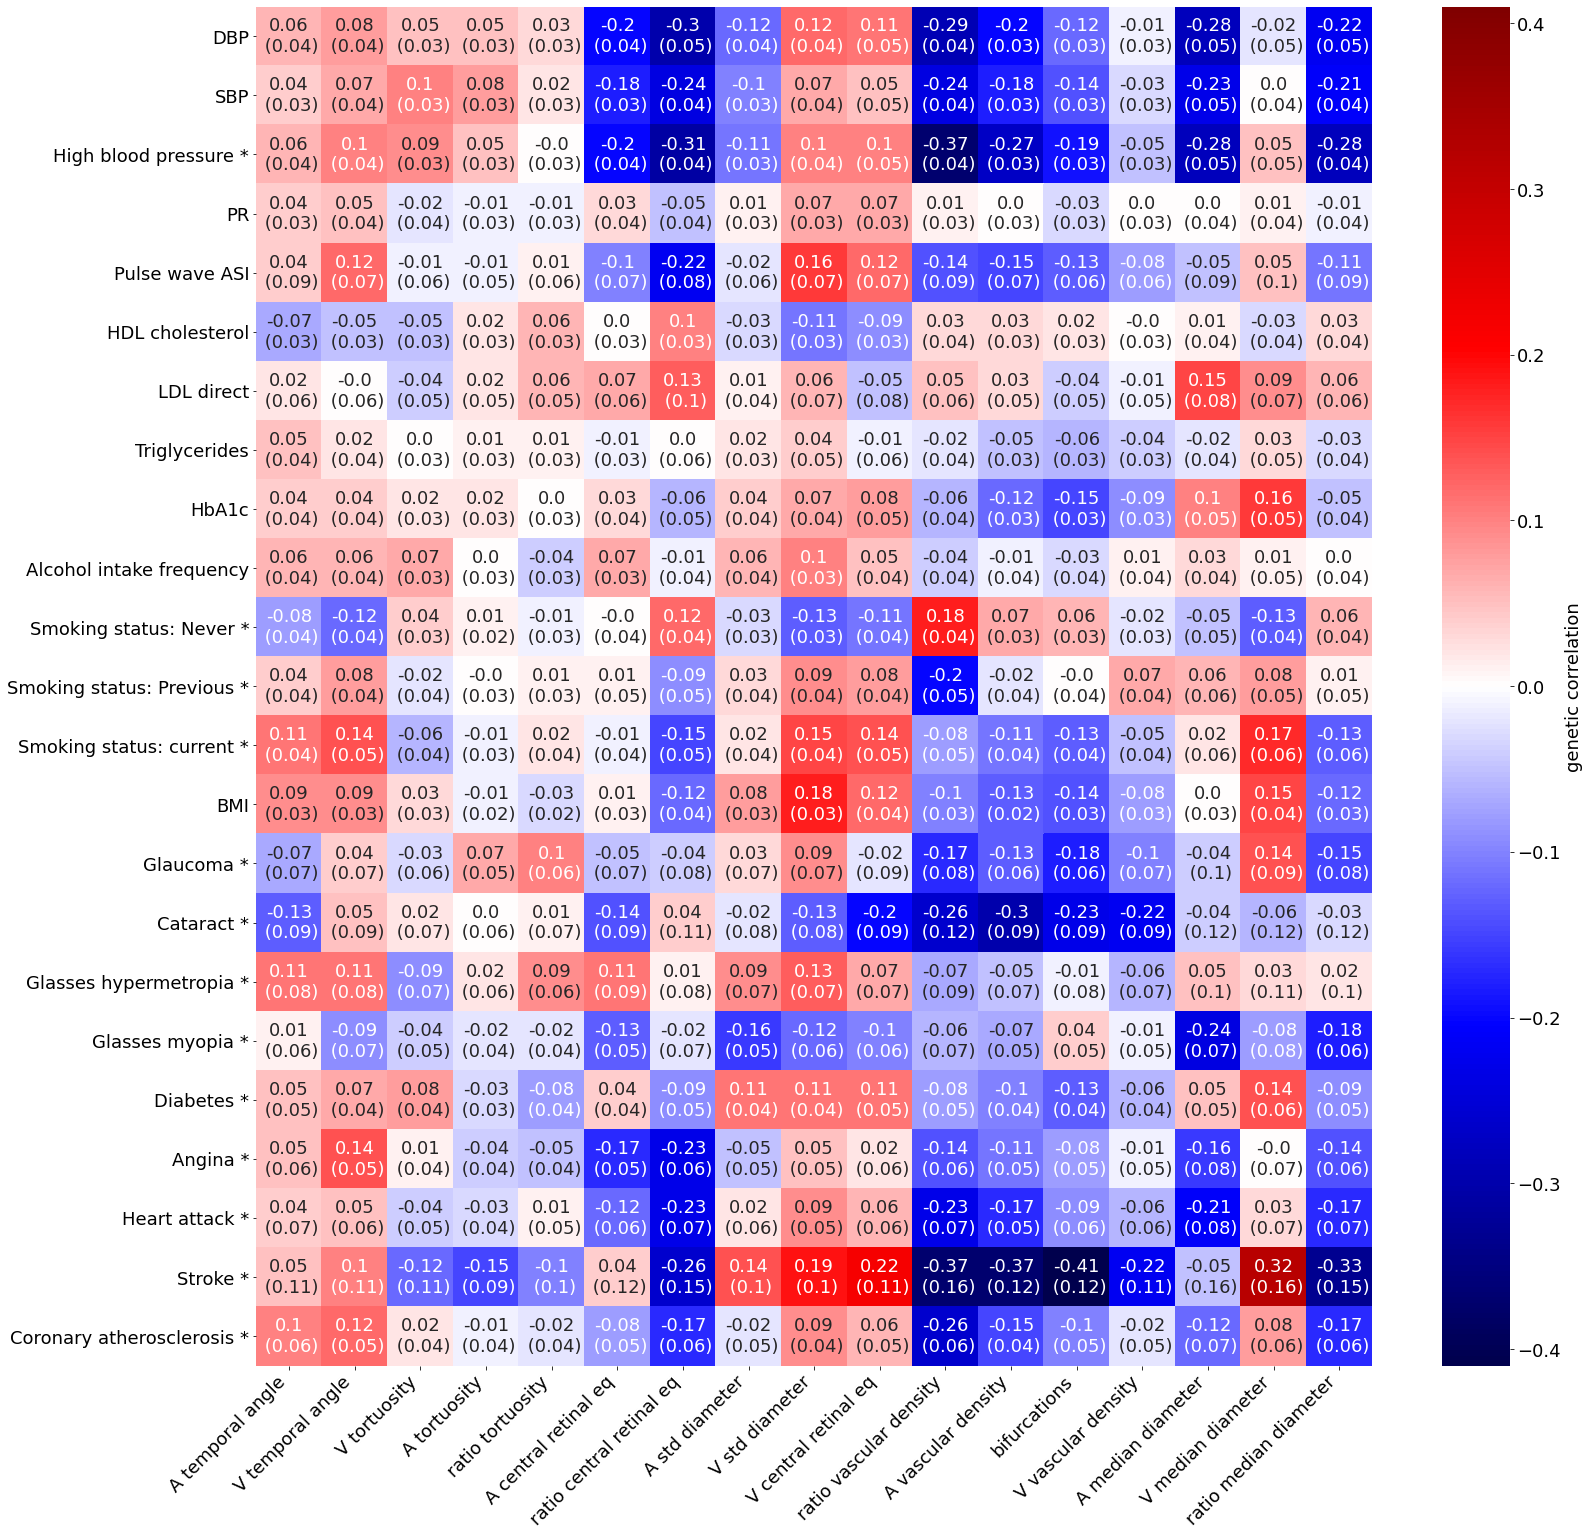

In [45]:
##min gcorr
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18

#print(df_corr_simpl.head(1))
df_corr_simpl= -1*df_corr_simpl.copy() ######harcoded!!!

df_corr_minus_std= (np.sign(df_corr_simpl))*((abs(df_corr_simpl) - abs(df_std_simpl)))
df_corr_minus_std = df_corr_minus_std.astype(float)

#print(df_corr_simpl.head(1))
df = df_corr_simpl.astype(str) + '\n (' + df_std_simpl.astype(str)+ ')'

df_corr_minus_std= df_corr_minus_std.T
df=df.T

df_corr_simpl = df_corr_simpl.astype(float)

plt.rcParams['font.size'] = '18'
#figsize_val_2=(30, 30)
if only_continuos == True:
    figsize_val_2=(25, 10)
else:
    figsize_val_2=(25, 25)
#figsize_val_2=(10, 10)
fig, ax = plt.subplots(figsize=figsize_val_2)
# fig1 = sns.heatmap(df_corr_minus_std, 
#             annot=df.values, #(log10p>Bonf_thresh).replace({True:'*', False:''}), 
#             cbar=True, #If not False
#             fmt="", #annot_kws={'weight': 'bold'}, 
#             vmin=-abs(df_corr_minus_std).max().max(),
#             vmax=abs(df_corr_minus_std).max().max(), 
#             cmap='seismic',alpha=1.0, cbar_kws={'label': 'minimum genetic correlation'},
#             ax=ax)

fig1 = sns.heatmap(df_corr_simpl.T, 
            annot=df.values, #(log10p>Bonf_thresh).replace({True:'*', False:''}), 
            cbar=True, #If not False
            fmt="", #annot_kws={'weight': 'bold'}, 
            vmin=-abs(df_corr_simpl.T).max().max(),
            vmax=abs(df_corr_simpl.T).max().max(), 
            cmap='seismic',alpha=1.0, cbar_kws={'label': 'genetic correlation'},
            ax=ax)
plt.xticks(rotation=45, ha='right')

# Figure 2: Separate continuos and cases/controls

In [46]:
## TO DO:

# Filtering by dtype: 
#df_file_continuous= df_inf_filt[df_inf_filt['dtype']=='con']

#traits_new_continuous = list(df_inf_filt['final_name'].values)


# Figure 3: Simplified gcorr diseases

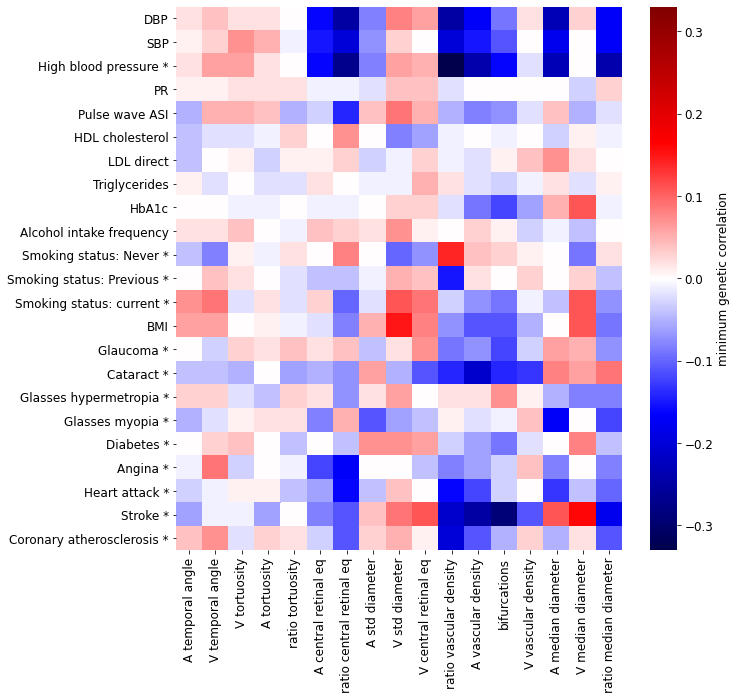

In [47]:
##min gcorr
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12


plt.rcParams['font.size'] = '12'
#figsize_val_2=(30, 30)
figsize_val=(10, 10)
#figsize_val_2=(10, 10)
fig, ax = plt.subplots(figsize=figsize_val)
fig1 = sns.heatmap(df_corr_minus_std,  #(log10p>Bonf_thresh).replace({True:'*', False:''}), 
            cbar=True, #If not False
            fmt="", #annot_kws={'weight': 'bold'}, 
            vmin=-abs(df_corr_minus_std).max().max(),
            vmax=abs(df_corr_minus_std).max().max(), 
            cmap='seismic',alpha=1.0, cbar_kws={'label': 'minimum genetic correlation'},
            ax=ax)
#plt.xticks(rotation=45, ha='right')

# - OTHER PLOTS - SQUARED (all):

#### a) HEAT MAP all:

Text(0.5, 1.0, 'Genetic Correlation')

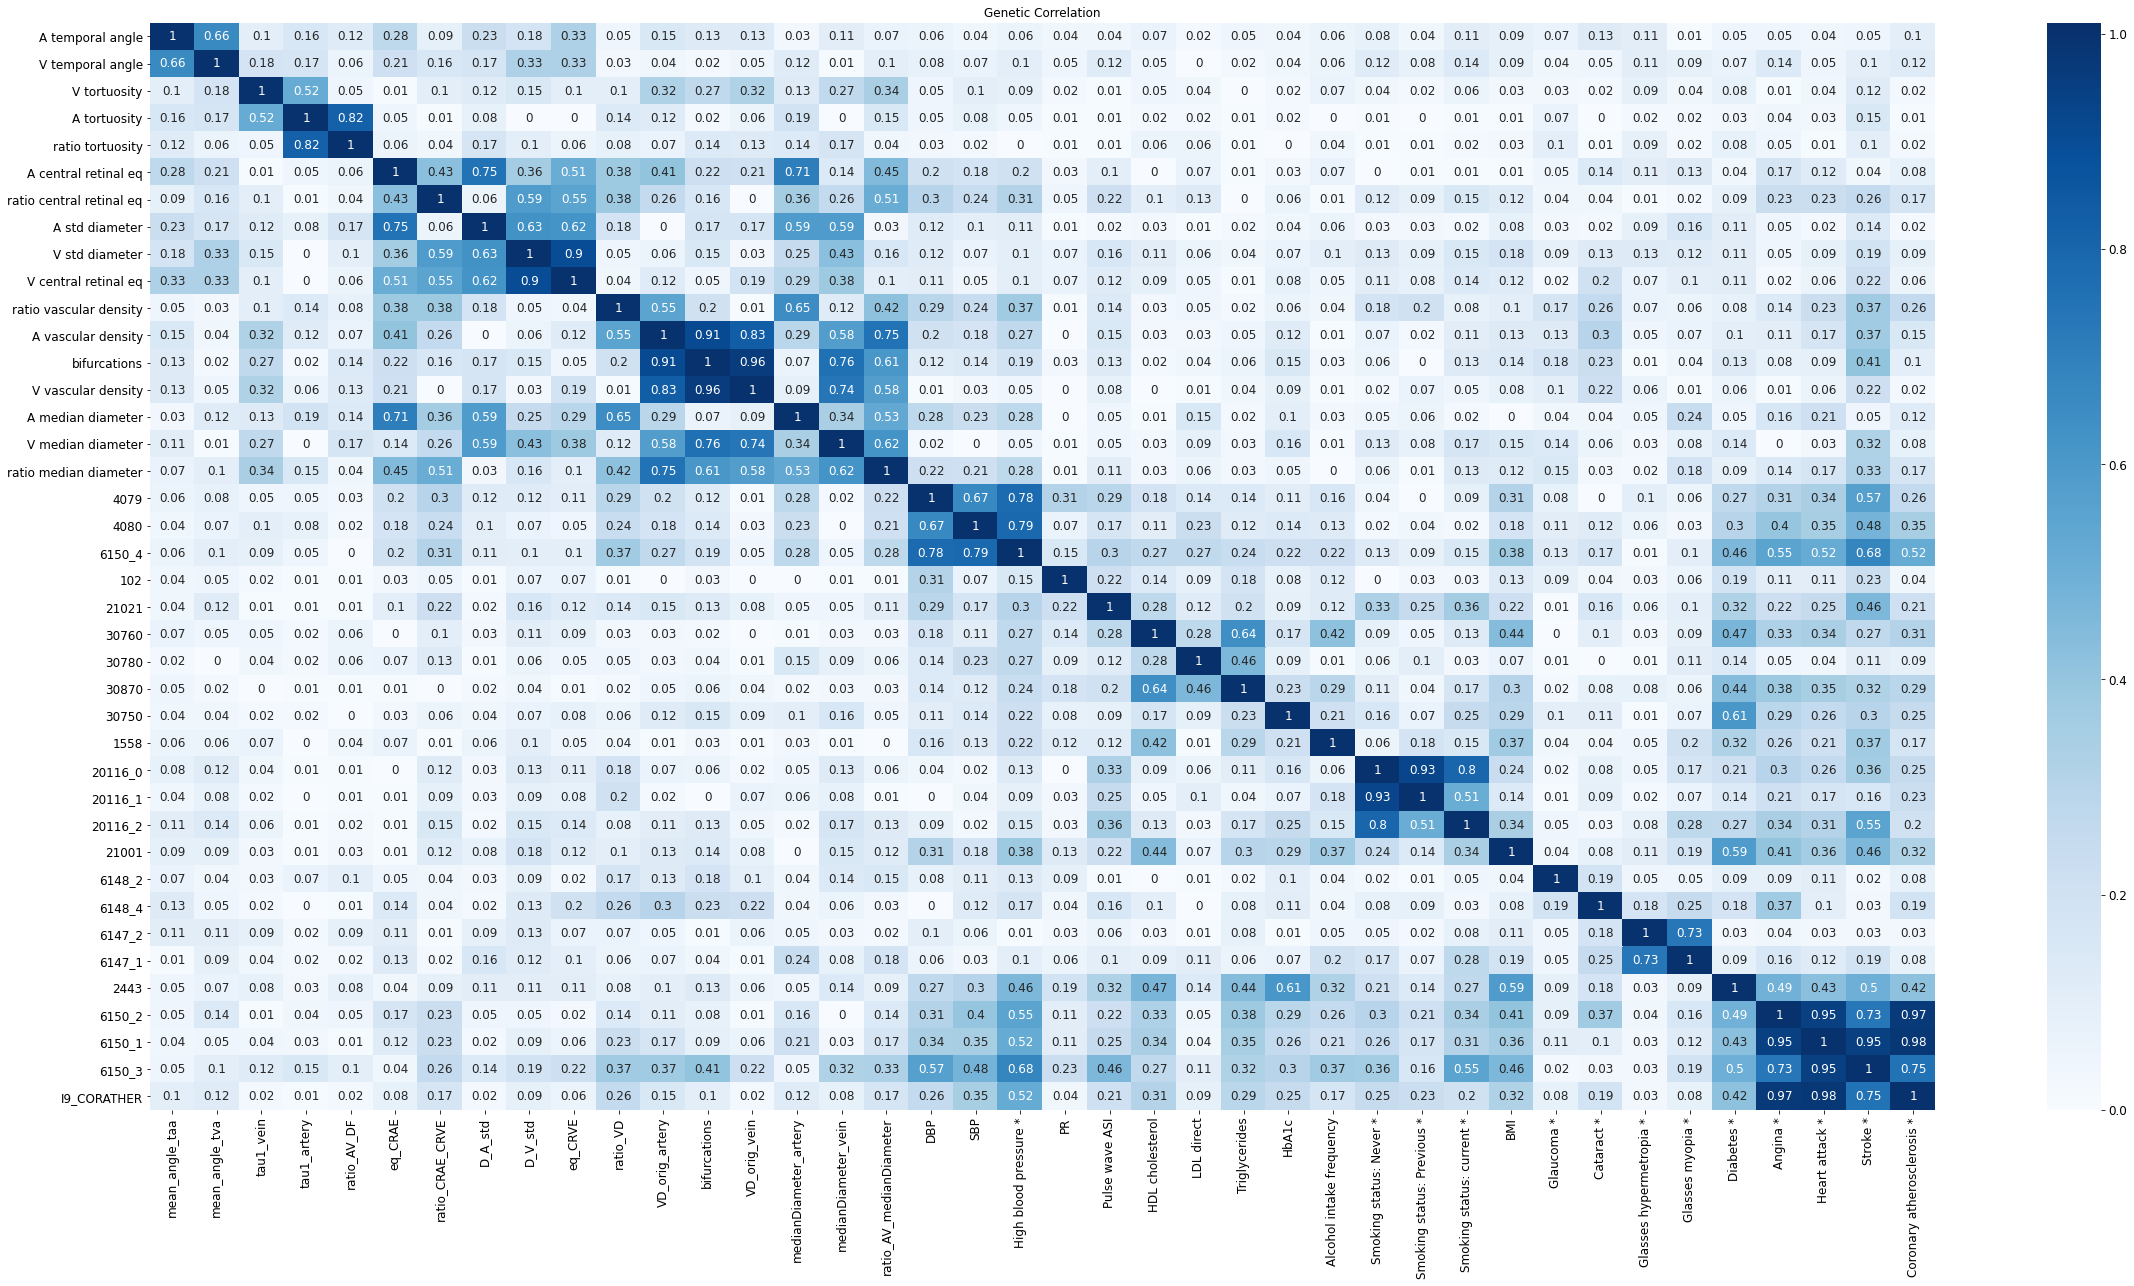

In [48]:
##### PLOT
df_corr = df_corr.astype(float)
df_corr= df_corr.replace(np.nan, 0)


df_corr= rename_col_index(df_corr, list(traits_phenos), list(traits_phenos_new), list(traits_all), list(traits_all_new))    

plt.figure(figsize=(40,20))
#plt.figure(figsize=(10,10))
sb.heatmap(abs(df_corr),cmap="Blues",annot=True)
#sb.heatmap(df2,vmin=0, vmax=1,cmap="Blues",annot=True)
plt.title('Genetic Correlation')
#plt.savefig(save_dir+str(DATE)+'_'+'ventile'+str(ventile_num)+'_heatmap_diseases_gcorr.pdf', bbox_inches='tight', dpi=250)


#### b) pairwise distance metric: an easy proxy for "correlation distance": 1 - abs(corr)
##### clustering method: average

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


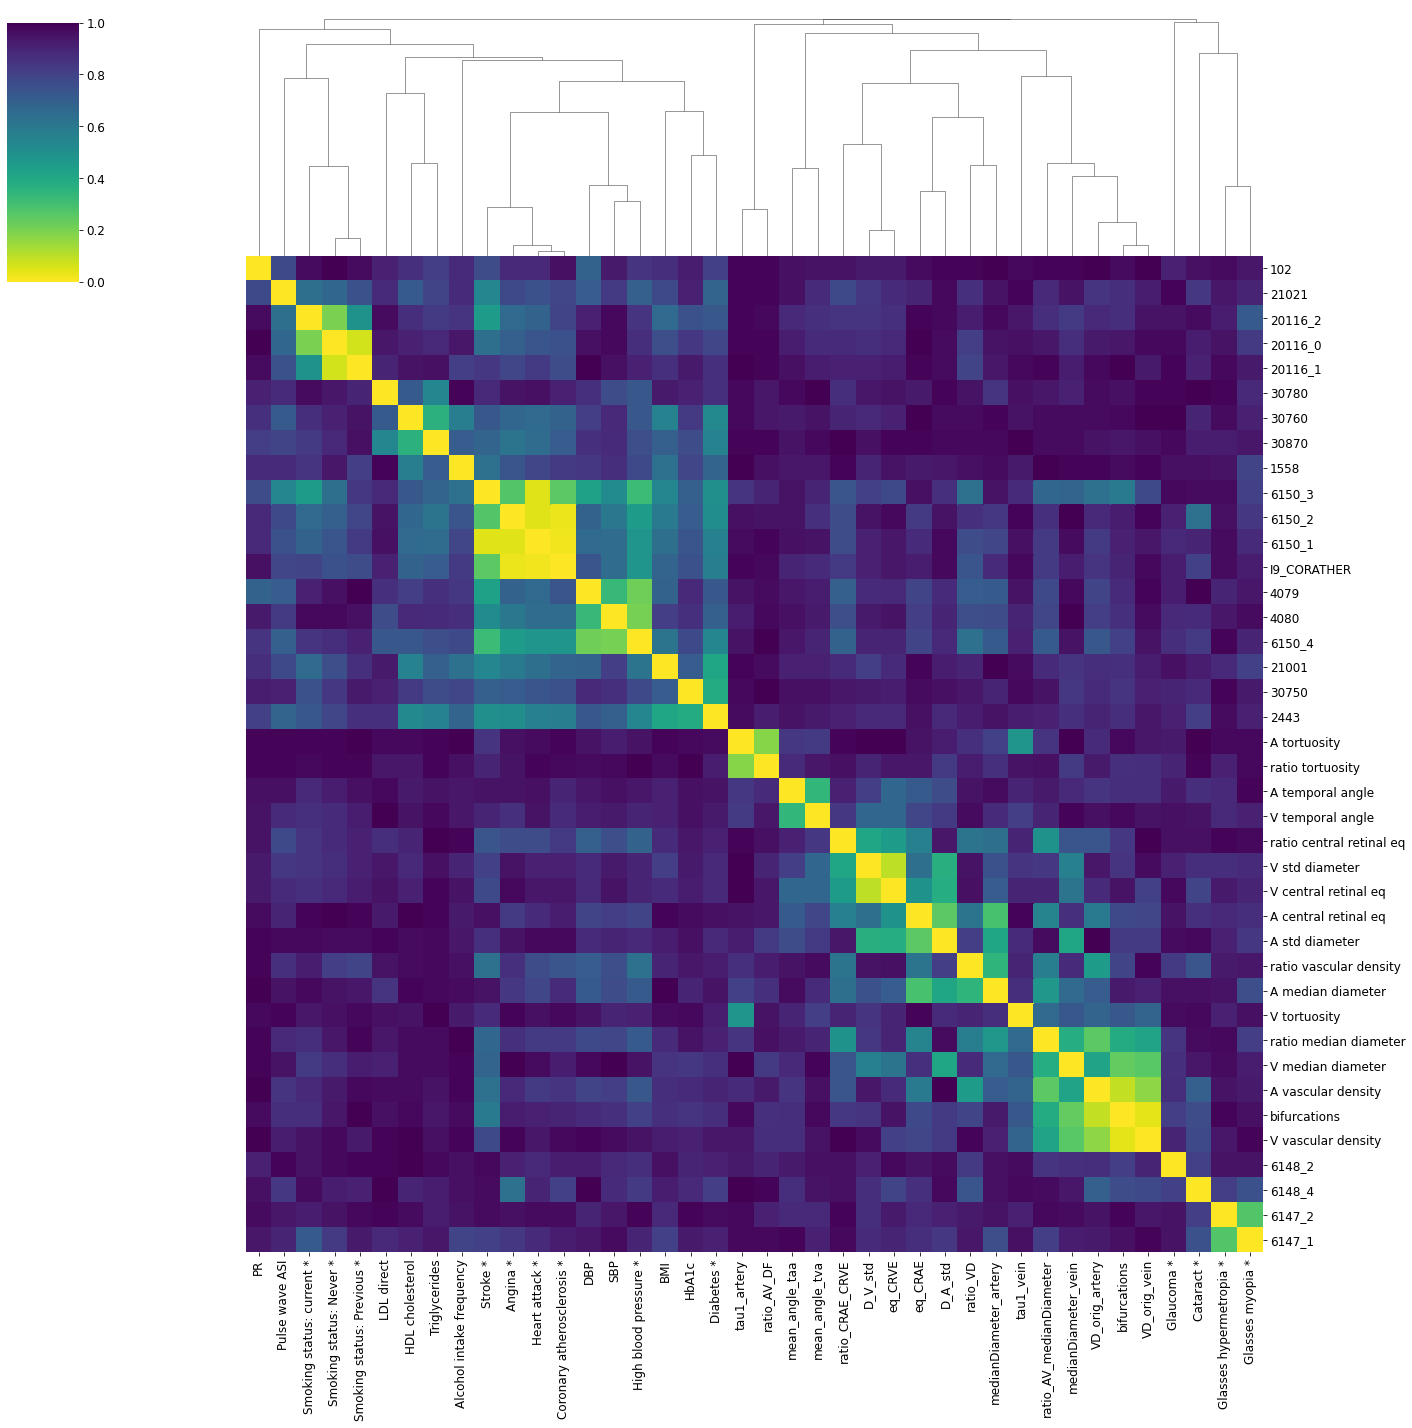

In [49]:
import seaborn as sns
from matplotlib import cm
from matplotlib import pyplot as plt
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
### You need to: 
## - delete the nans, 
## - diagonal to 0, and
## - abs(linkage)

df_2_nan = df_corr
df_2_nan=df_2_nan.replace(np.nan,1)
#print('Count nans: ', df2.isna().sum().sum(), df_2_nan.isna().sum().sum())
# pairwise distance: define distance between two perfectly negatively correlated traits as 0
df_otro = 1 - abs(df_2_nan) 
## diagonal same value:
df_otro.values[[np.arange(df_otro.shape[0])]*2] = 0

linkage = hc.linkage(sp.distance.squareform(df_otro), method='average')
lik_abs= abs(linkage)
h = sns.clustermap(df_otro, row_linkage=lik_abs, col_linkage=lik_abs, cmap=cm.get_cmap('viridis_r'), figsize=(20,20), vmin=0, vmax=1)
h.ax_row_dendrogram.set_visible(False)
#h.ax_heatmap.xaxis.tick_top()
h.ax_heatmap.tick_params(axis='x', rotation=90)
#plt.savefig('/SSD/home/sofia/retina-phenotypes/complementary/GWAS_postprocessing/ldsr_correlation/diseases_12_08_2022_gcorrimagen.jpg')

# SCATTER PLOT PHENOTYPIC- GENETIC ASSOCIATION WITH DISEASES

In [50]:
### genetic value == df_corr_minus_std OR df_corr (TO DECIDE)
### phenotypic value == betas

####Phenotypic association with diseases:
file_info_name='pheno_diseases_info.csv'
pheno_info_file = '/SSD/home/sofia/retina-phenotypes/complementary/'+str(file_info_name)
display_info=True
date='2022_11_23'
ventile='covar_fix'

diseases_dir ='/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/diseases_cov/'
betas=pd.read_csv(diseases_dir+'reg_betas_.csv', index_col=0)
log10p=pd.read_csv(diseases_dir+'reg_log10p_.csv', index_col=0)
betas = betas.astype('float64') # in case betas was coded as object type
## Rename columns and index
df_inf_filt_LR =  df_inf_csv[df_inf_csv['main_supl']=='main']
df_inf_filt_LR = df_inf_filt_LR.append(df_inf_csv[df_inf_csv['main_supl']=='hr'])
list_diseases_LR = df_inf_filt_LR['name_LR'].values
list_diseases_LR_new = df_inf_filt_LR['final_name'].values 
betas= rename_col_index(betas, list(traits_phenos), list(traits_phenos_new), list(list_diseases_LR), list(list_diseases_LR_new)) 
## Diseases == y-axis and Vascular phenos == x-axis
betas = betas.T


In [51]:
print('ATENTION! -> Phenoty and genetically we have different sizes, we do not have biyective function between them. So it is needed to make decisions')
print('len(df_corr_minus_std) and len(betas): ', len(df_corr_minus_std), len(betas))
print(df_corr_minus_std.index, betas.index)
list_intersection_phe_gen = list(set(df_corr_minus_std.index) & set(betas.index))
print('They have in common ', len(list_intersection_phe_gen), ' -> names: ', list_intersection_phe_gen)


ATENTION! -> Phenoty and genetically we have different sizes, we do not have biyective function between them. So it is needed to make decisions
len(df_corr_minus_std) and len(betas):  23 32
Index(['DBP', 'SBP', 'High blood pressure *', 'PR', 'Pulse wave ASI',
       'HDL cholesterol', 'LDL direct', 'Triglycerides', 'HbA1c',
       'Alcohol intake frequency', 'Smoking status: Never *',
       'Smoking status: Previous *', 'Smoking status: current *', 'BMI',
       'Glaucoma *', 'Cataract *', 'Glasses hypermetropia *',
       'Glasses myopia *', 'Diabetes *', 'Angina *', 'Heart attack *',
       'Stroke *', 'Coronary atherosclerosis *'],
      dtype='object') Index(['DBP', 'SBP', 'High blood pressure', 'PR', 'Pulse wave ASI',
       'HDL cholesterol', 'LDL direct', 'Triglycerides', 'HbA1c',
       'Alcohol intake frequency', 'N_cigarettes_curr_daily_both',
       'Pack smoked per year', 'BMI', 'Glaucoma', 'Cataract', 'Amblyopia',
       'Presbyopia', 'Hypermetropia', 'Myopia', 'Astigmati

Index(['A temporal angle', 'V temporal angle', 'V tortuosity', 'A tortuosity',
       'ratio tortuosity', 'A central retinal eq', 'ratio central retinal eq',
       'A std diameter', 'V std diameter', 'V central retinal eq',
       'ratio vascular density', 'A vascular density', 'bifurcations',
       'V vascular density', 'A median diameter', 'V median diameter',
       'ratio median diameter'],
      dtype='object')
DBP 0.7479022015205986
BMI 0.7432259911756827
HDL cholesterol 0.5665767238481675
SBP 0.7338936484015101
PR 0.3434418844919187
Alcohol intake frequency 0.21403685396721195
Triglycerides 0.00651257180563201
Pulse wave ASI 0.33325320677543124
HbA1c 0.6760886924094659
LDL direct 0.030949190756103095


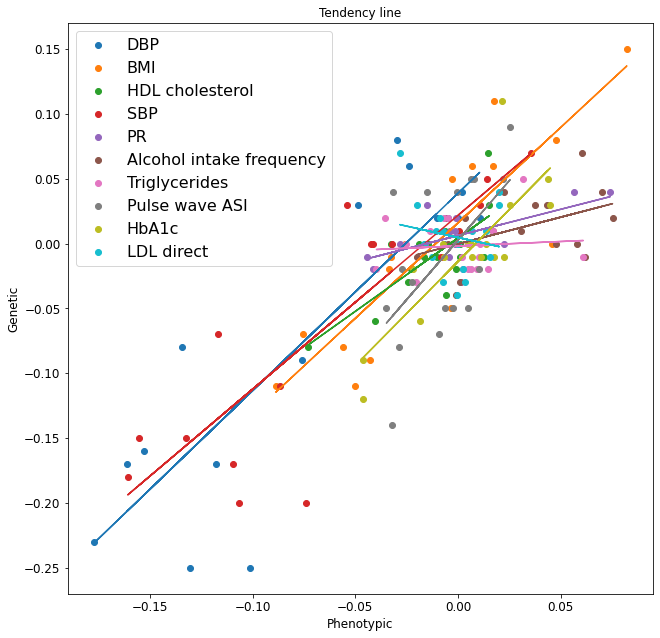

Index(['DBP', 'BMI', 'HDL cholesterol', 'SBP', 'PR',
       'Alcohol intake frequency', 'Triglycerides', 'Pulse wave ASI', 'HbA1c',
       'LDL direct'],
      dtype='object')
A temporal angle 0.21740808662901057
V temporal angle 0.13118617659699194
V tortuosity 0.13555745152746376
A tortuosity 0.005635989488270753
ratio tortuosity 0.13136172751704736
A central retinal eq 0.9211593720897073
ratio central retinal eq 0.7305318373094131
A std diameter 0.5561747294724324
V std diameter 0.2597940831517164
V central retinal eq 0.3844277790630842
ratio vascular density 0.733490203571477
A vascular density 0.8648365467871395
bifurcations 0.7515924364783071
V vascular density 0.07602128668507774
A median diameter 0.7368724840140117
V median diameter 0.08217421387950921
ratio median diameter 0.7444661045671088


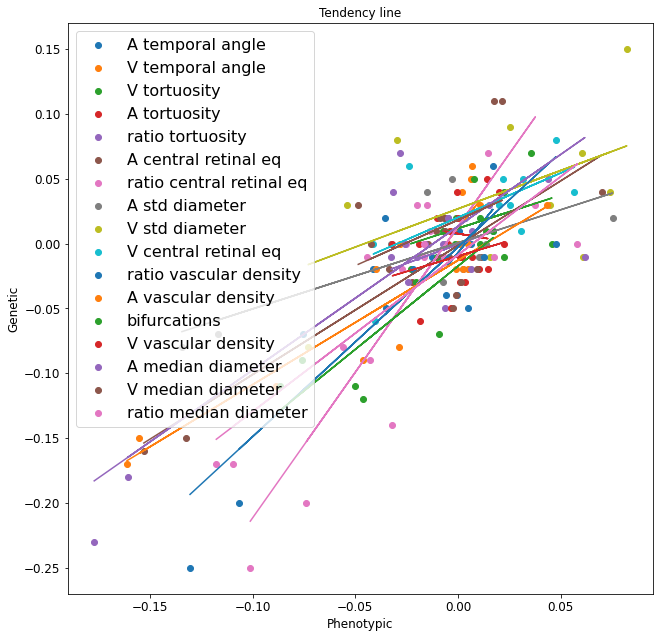

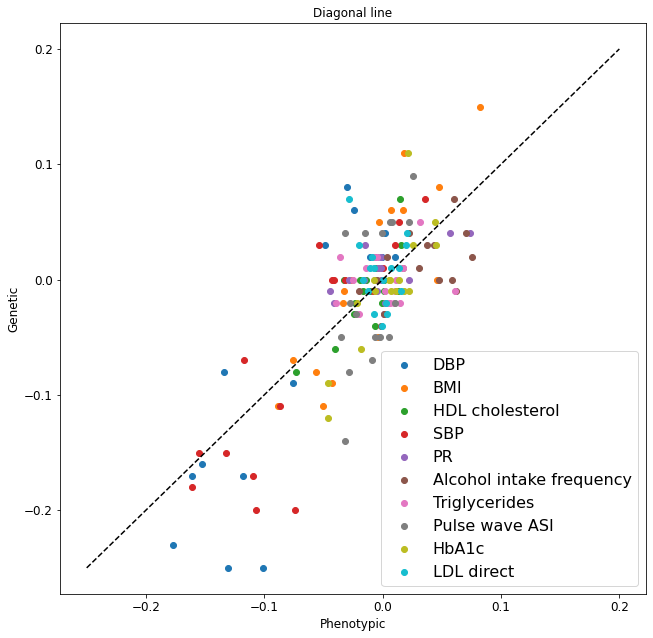

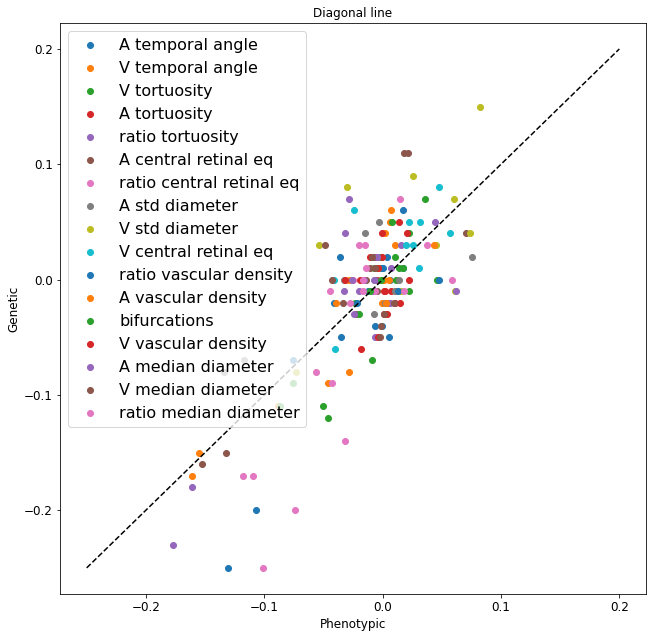

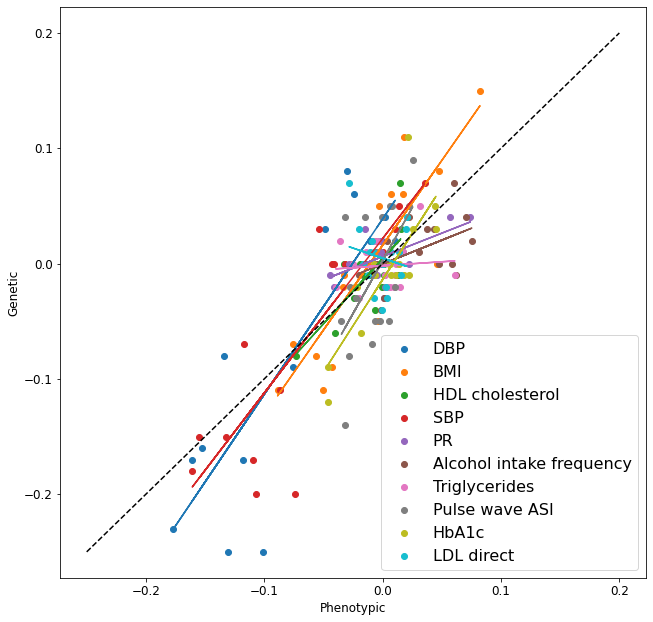

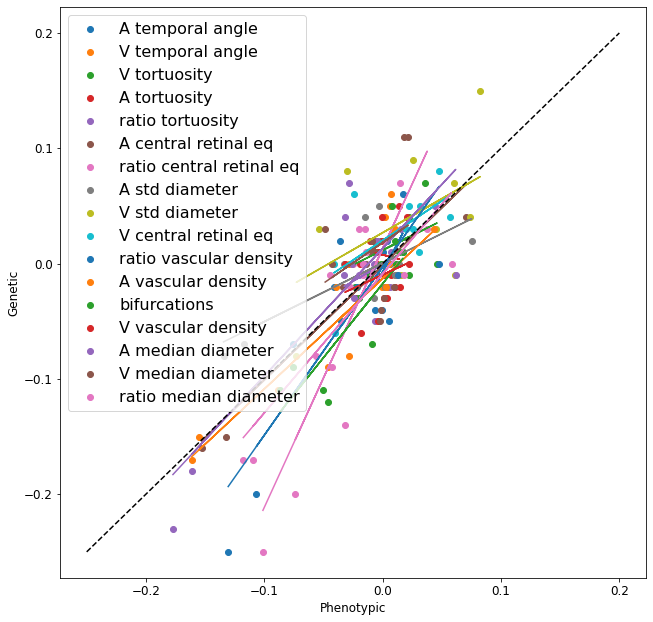

In [52]:
## PLOTS:

import scipy
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value, r_value**2

def phen_gen_scatter(df_1, df_2, name_title):
    df_index=df_1
    print(df_1.index)
    #df_index['index']= df_1.index
    #print(df_index['index'])

    fig = plt.gcf()
    fig.set_size_inches(10.5, 10.5)
    for col in df_1.columns:
        plt.scatter(df_1[col], df_2[col], label=col)
        r_value, r_value2 = rsquared(df_1[col], df_2[col])
        print( col , r_value2)
        z = np.polyfit(np.array(df_1[col]), np.array(df_2[col]), 1)
        p = np.poly1d(z)
        #add trendline to plot
        plt.plot(np.array(df_1[col]), p(np.array(df_1[col])))
    plt.legend(loc='best', fontsize=16)
    plt.xlabel('Phenotypic')
    plt.ylabel('Genetic')
    plt.title(name_title)
    plt.show()
    #fig.savefig('test2png.png', dpi=100)

def phen_gen_scatter_diag(df_1, df_2, name_title):
    #df_index=df_1
    #df_index['index']= df_1.index

    fig = plt.gcf()
    fig.set_size_inches(10.5, 10.5)
    for col in df_1.columns:
        plt.scatter(df_1[col], df_2[col], label=col)

    #plt.scatter(c=df_index['index'],  cmap="jet")
    ident = [-0.25, 0.2]
    plt.plot(ident,ident, color='black', linestyle='dashed')
    plt.legend(loc='best', fontsize=16)
    plt.xlabel('Phenotypic')
    plt.ylabel('Genetic')
    plt.title(name_title)
    plt.show()
    #fig.savefig('test2png.png', dpi=100)


def phen_gen_scatter_diag_tend(df_1, df_2):
    #df_index=df_1
    #df_index['index']= df_1.index

    fig = plt.gcf()
    fig.set_size_inches(10.5, 10.5)
    for col in df_1.columns:
        plt.scatter(df_1[col], df_2[col], label=col)
        z = np.polyfit(np.array(df_1[col]), np.array(df_2[col]), 1)
        p = np.poly1d(z)
        #add trendline to plot
        plt.plot(np.array(df_1[col]), p(np.array(df_1[col])))

    #plt.scatter(c=df_index['index'],  cmap="jet")
    ident = [-0.25, 0.2]
    plt.plot(ident,ident, color='black', linestyle='dashed')
    plt.legend(loc='best', fontsize=16)
    plt.xlabel('Phenotypic')
    plt.ylabel('Genetic')
    #plt.title(name_title)
    plt.show()
    #fig.savefig('test2png.png', dpi=100)


def phen_gen_scatter_one_at_the_time(df_1, df_2, name_title):
    for col in df_1.columns:
        fig = plt.gcf()
        fig.set_size_inches(10.5, 10.5)
        plt.scatter(df_1[col], df_2[col], label=col)
        z = np.polyfit(np.array(df_1[col]), np.array(df_2[col]), 1)
        p = np.poly1d(z)
        #add trendline to plot
        plt.plot(np.array(df_1[col]), p(np.array(df_1[col])))
        plt.legend(loc='best', fontsize=16)
        plt.xlabel('Phenotypic')
        plt.ylabel('Genetic')
        plt.title(name_title)
        plt.show()
    #fig.savefig('test2png.png', dpi=100)

def phen_gen_scatter_one_at_the_time_diag(df_1, df_2, name_title):
    for col in df_1.columns:
        fig = plt.gcf()
        fig.set_size_inches(10.5, 10.5)
        plt.scatter(df_1[col], df_2[col], label=col)
        ident = [-0.25, 0.2]
        plt.plot(ident,ident)
        plt.legend(loc='best', fontsize=16)
        plt.xlabel('Phenotypic')
        plt.ylabel('Genetic')
        plt.title(name_title)
        plt.show()

#phen_gen_scatter(betas, df_corr_minus_std)

### ONLY INTERSECTION:
betas_intersection = betas.T
betas_intersection = betas_intersection[list_intersection_phe_gen]

df_corr_simpl = df_corr_simpl.astype(float)
df_genetic_corr = df_corr_minus_std #df_corr_simpl.T  # df_corr_minus_std or df_corr_simpl

##### for binary ######
#### you can use both: df_corr_minus_std.T or df_corr_simpl
df_geno_used_binary = df_corr_minus_std.T # or df_corr_simpl, df_corr_minus_std.T
#######################

df_corr_minus_std_intersection = df_genetic_corr.T
df_corr_minus_std_intersection = df_corr_minus_std_intersection[list_intersection_phe_gen]

### TENDENCY LINE
phen_gen_scatter(betas_intersection, df_corr_minus_std_intersection, 'Tendency line')
phen_gen_scatter(betas_intersection.T, df_corr_minus_std_intersection.T, 'Tendency line')

#phen_gen_scatter_one_at_the_time(betas_intersection, df_corr_minus_std_intersection, 'Tendency line')
#phen_gen_scatter_one_at_the_time(betas_intersection.T, df_corr_minus_std_intersection.T, 'Tendency line')

### DIAGONAL 
phen_gen_scatter_diag(betas_intersection, df_corr_minus_std_intersection, 'Diagonal line')
phen_gen_scatter_diag(betas_intersection.T, df_corr_minus_std_intersection.T, 'Diagonal line')

### Both 
phen_gen_scatter_diag_tend(betas_intersection, df_corr_minus_std_intersection)
phen_gen_scatter_diag_tend(betas_intersection.T, df_corr_minus_std_intersection.T)

#phen_gen_scatter_one_at_the_time_diag(betas_intersection, df_corr_minus_std_intersection, 'Diagonal line')
#phen_gen_scatter_one_at_the_time_diag(betas_intersection.T, df_corr_minus_std_intersection.T, 'Diagonal line')


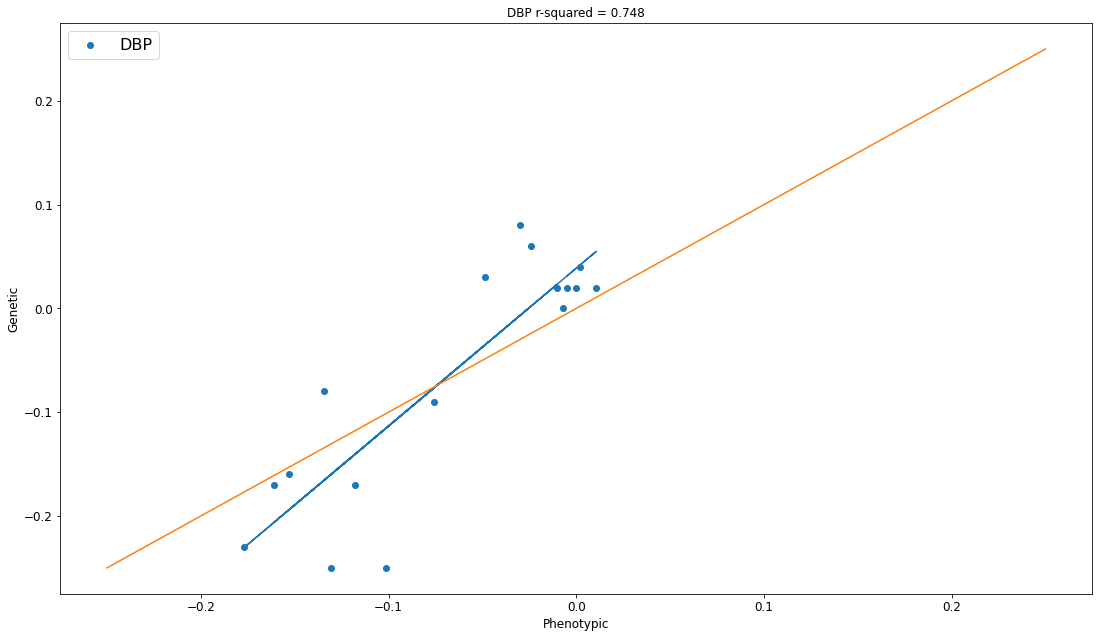

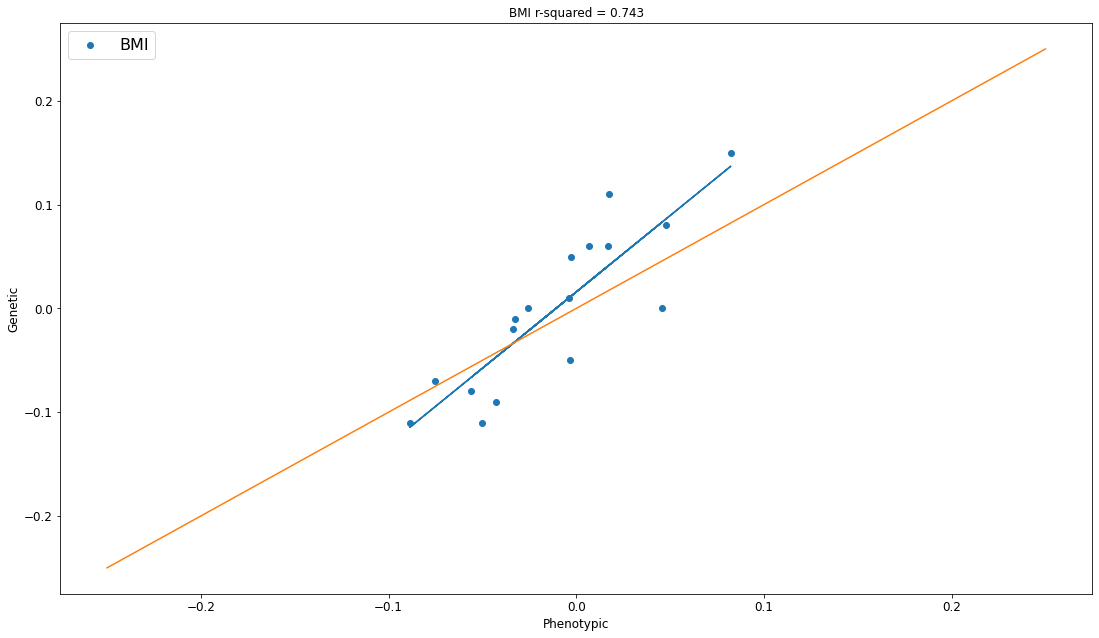

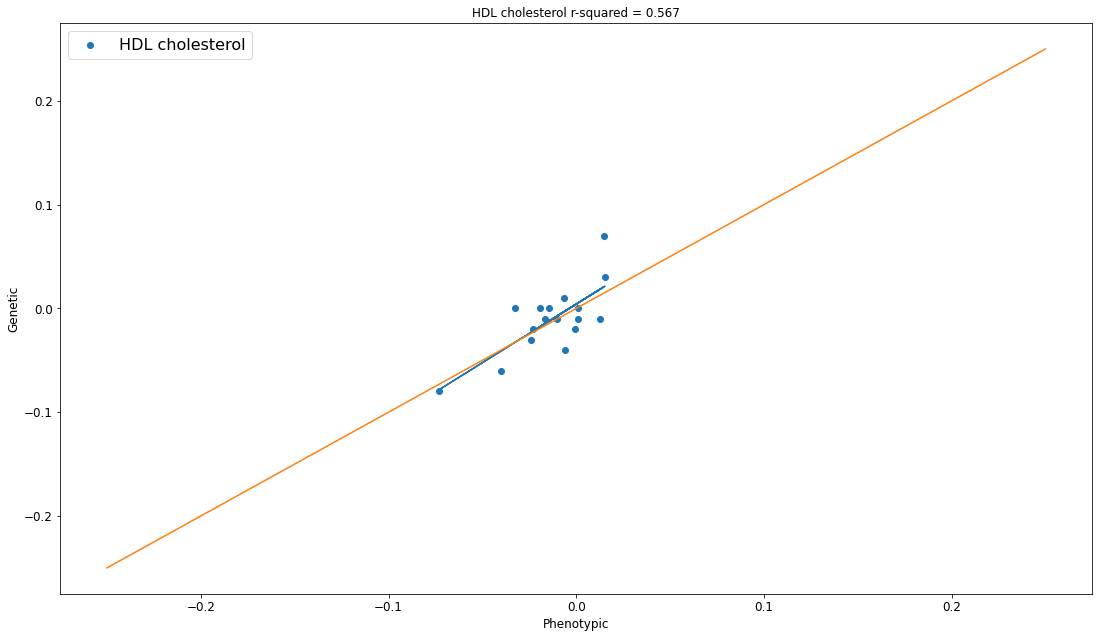

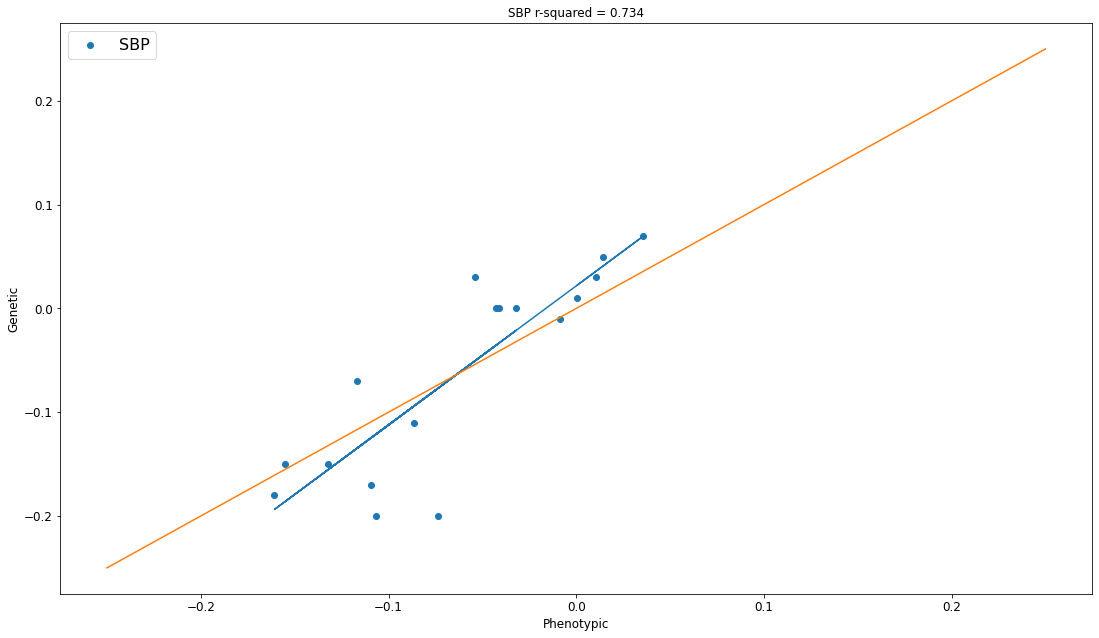

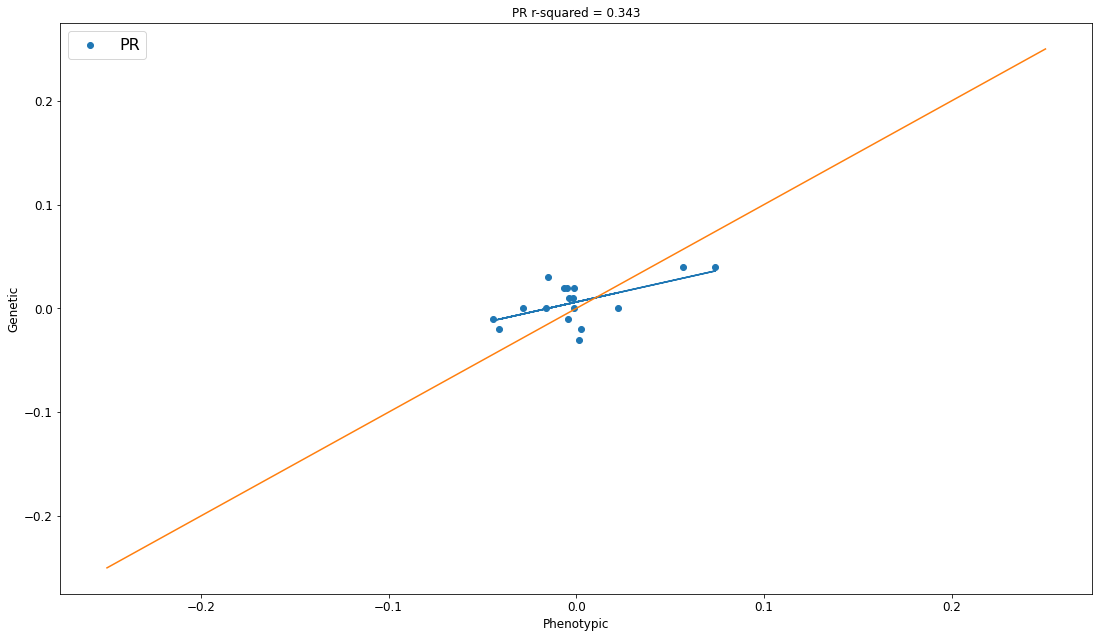

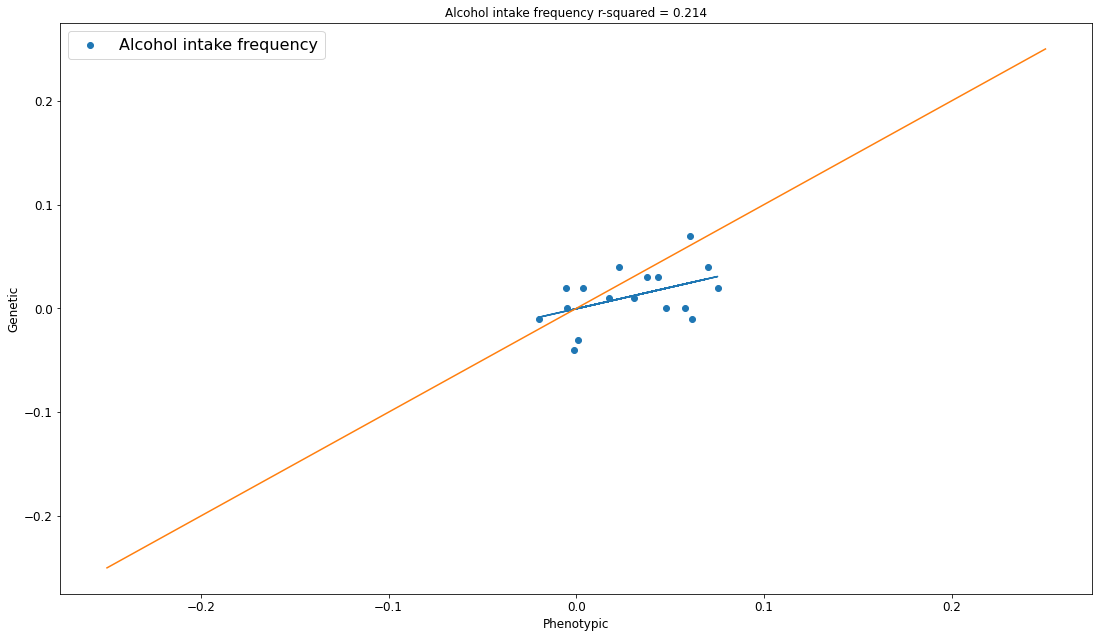

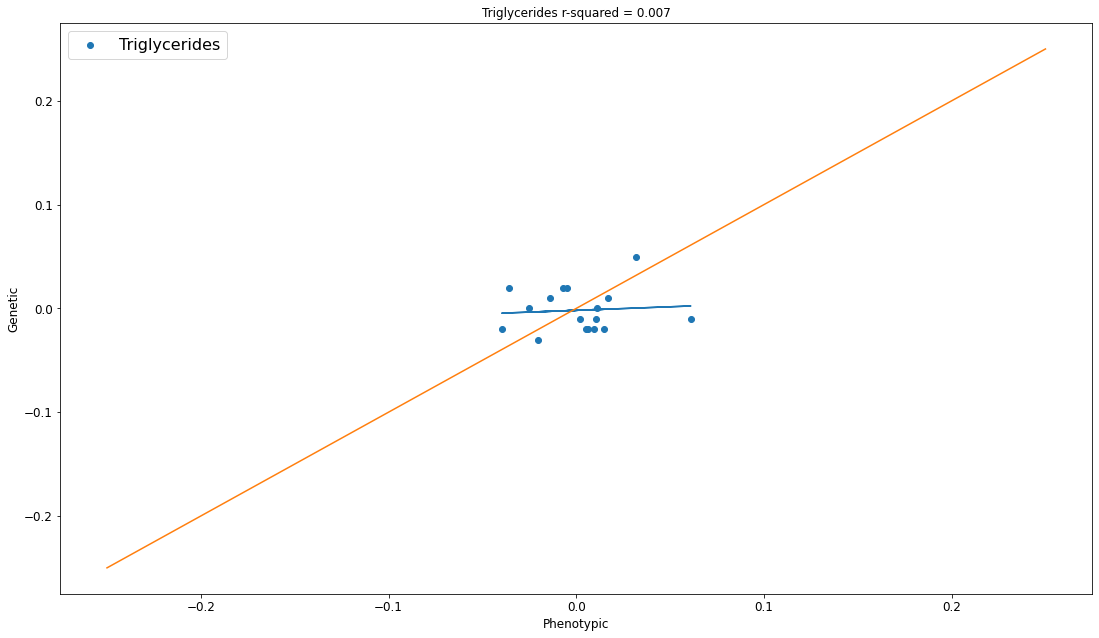

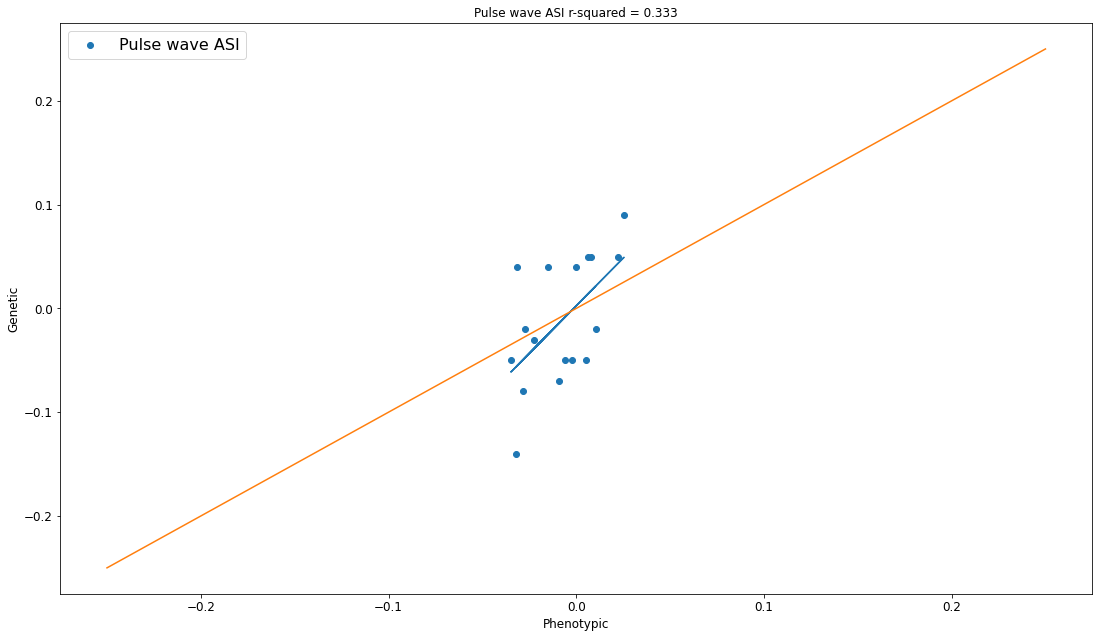

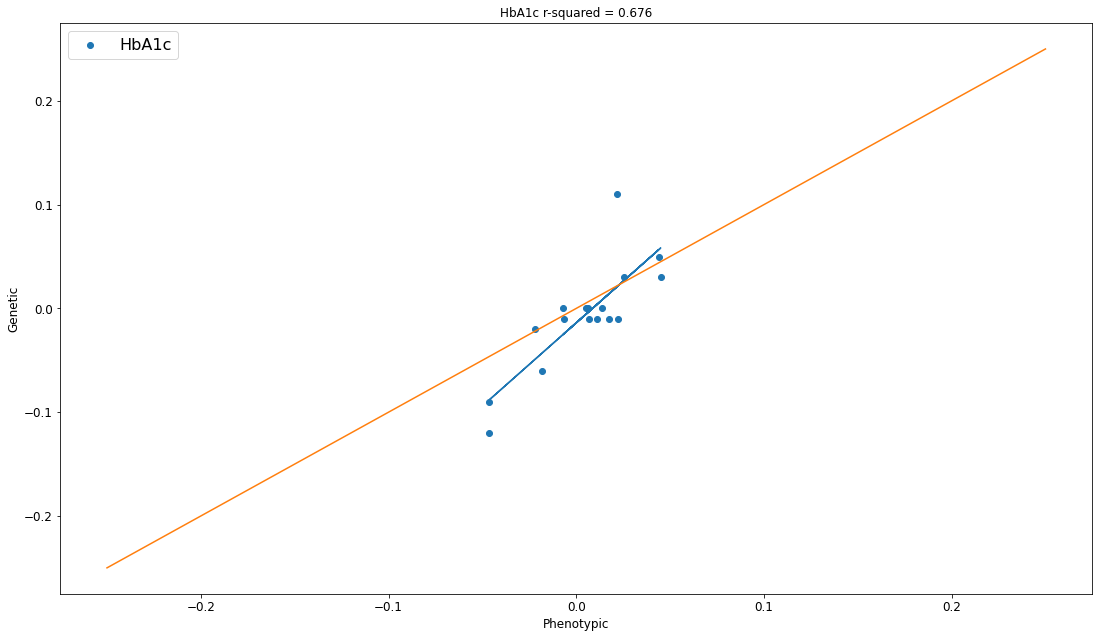

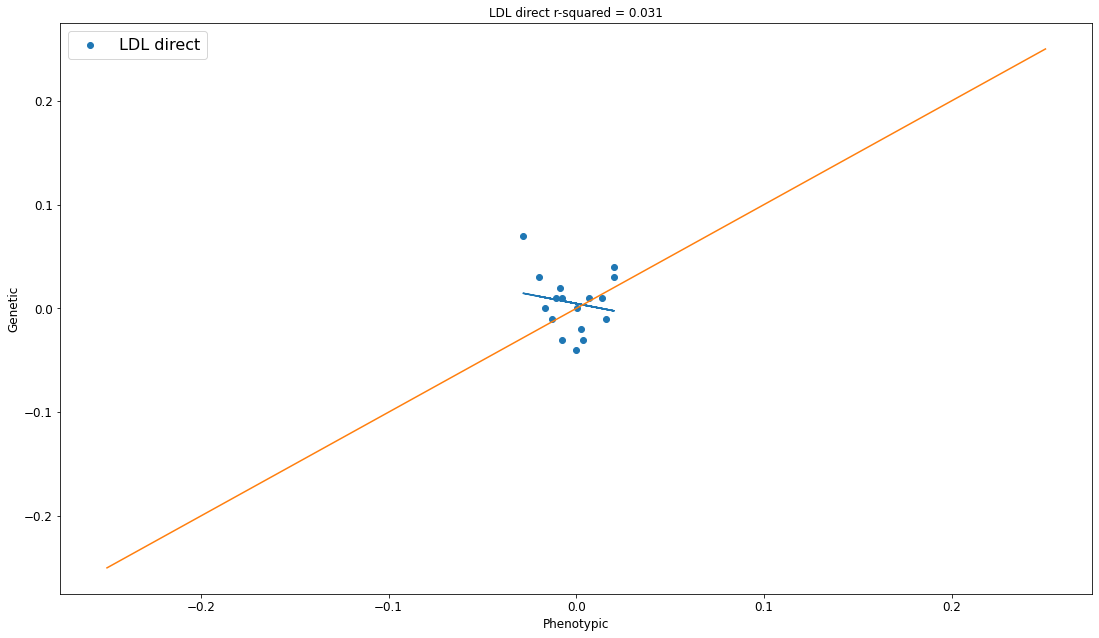

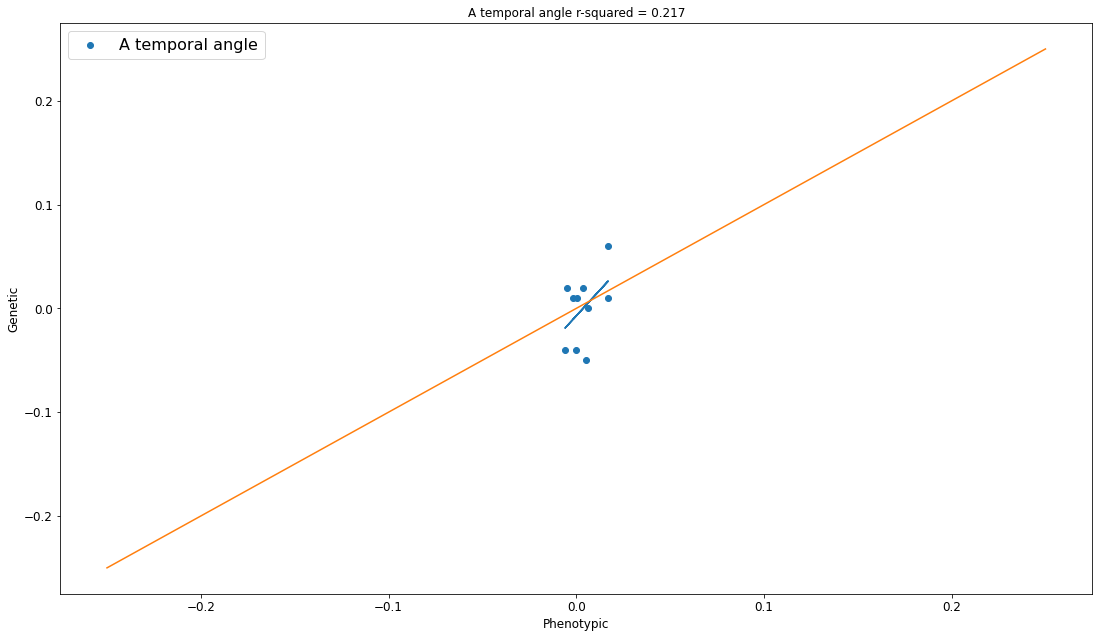

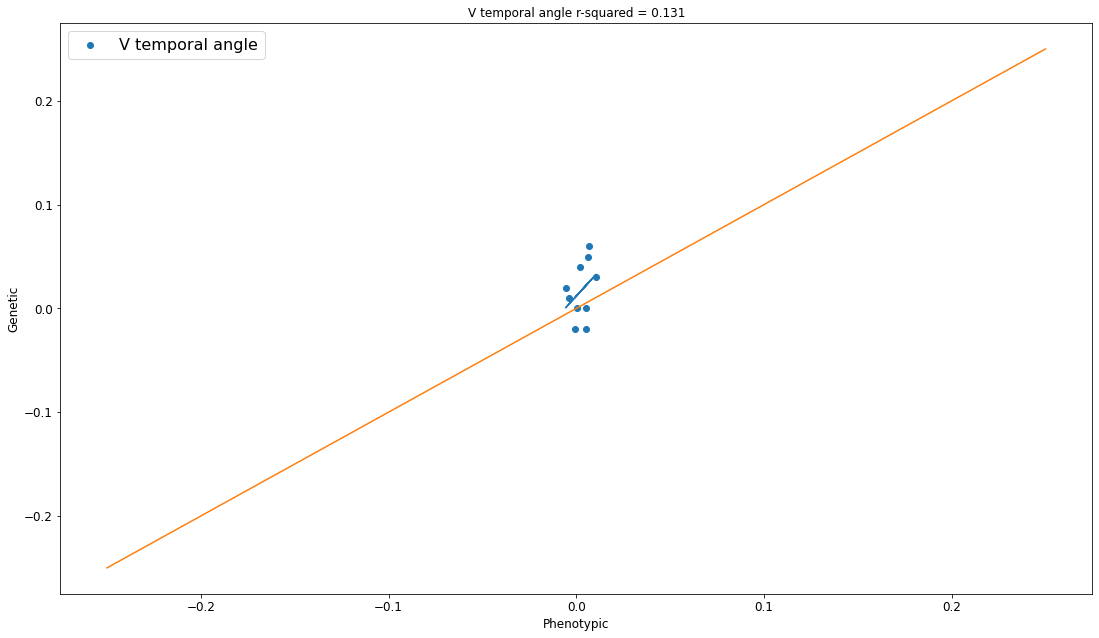

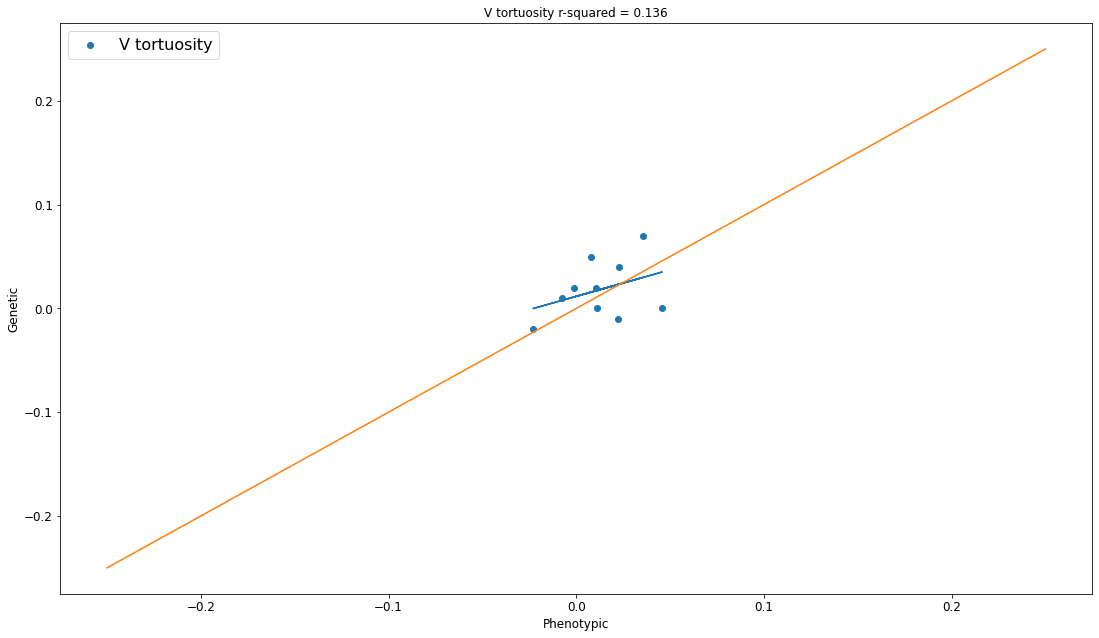

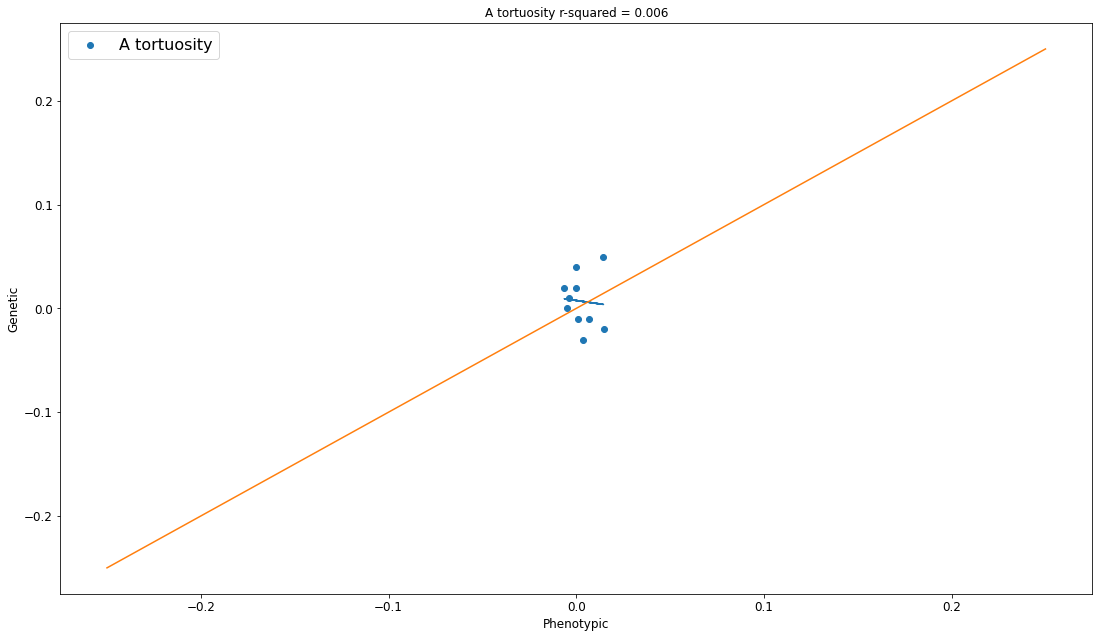

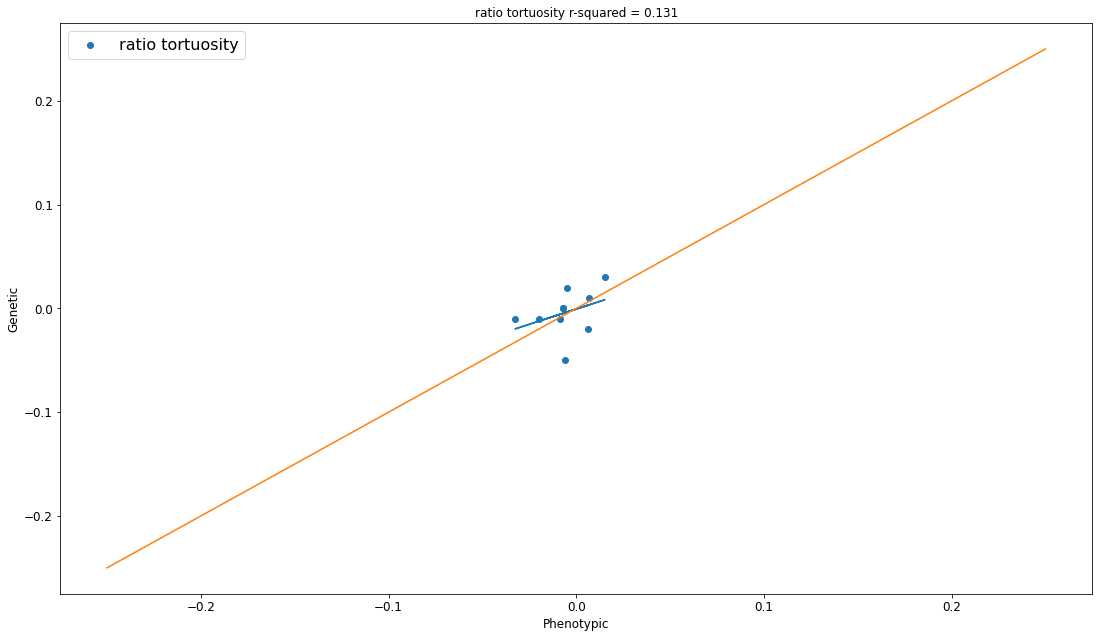

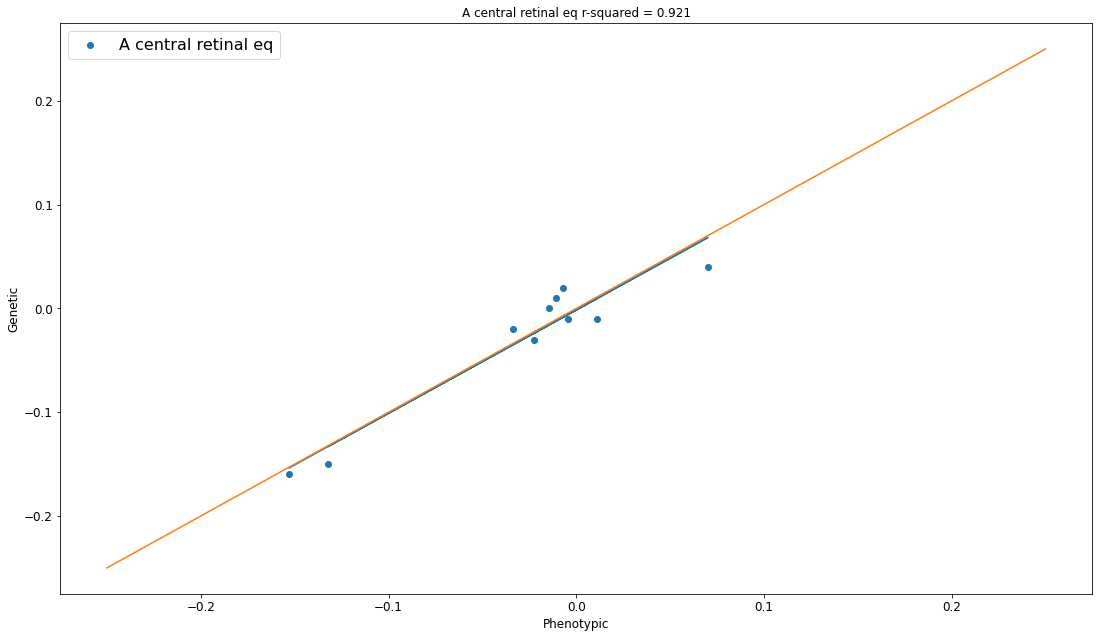

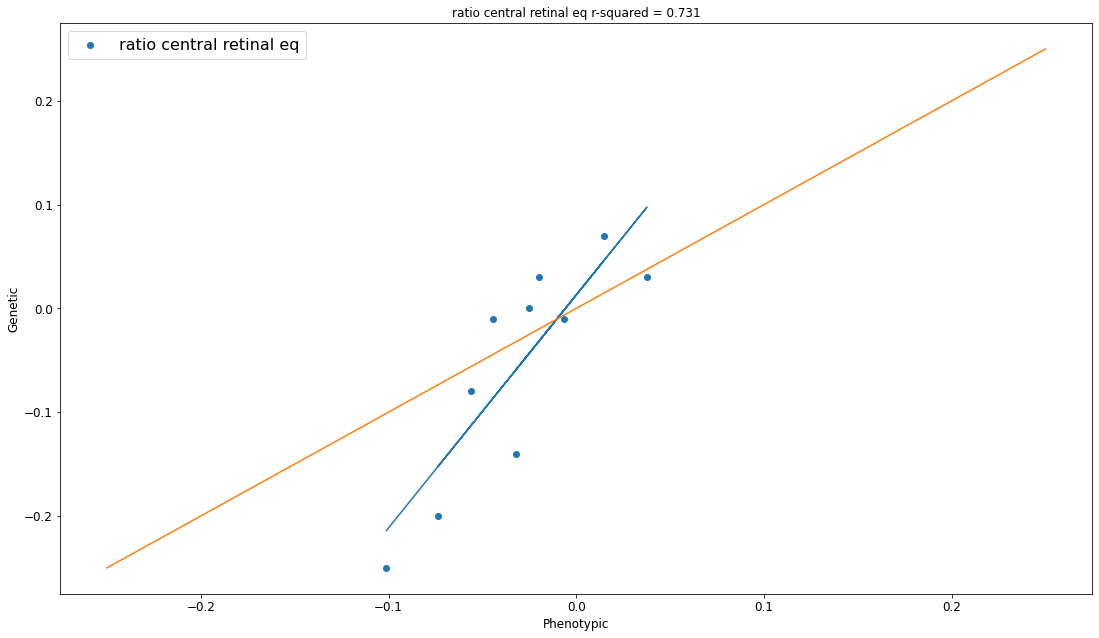

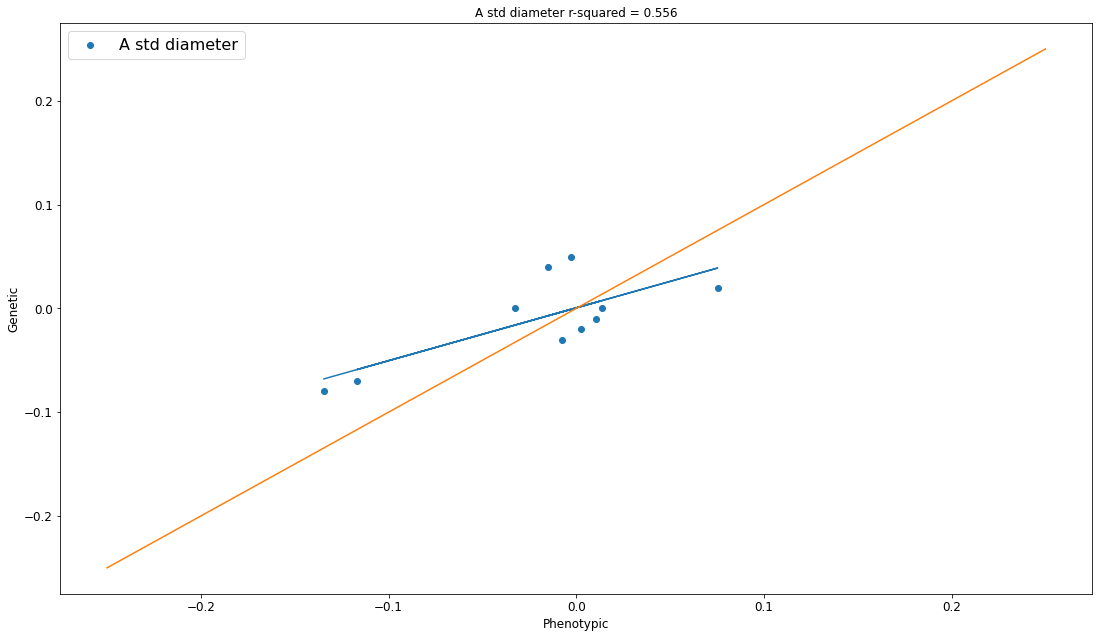

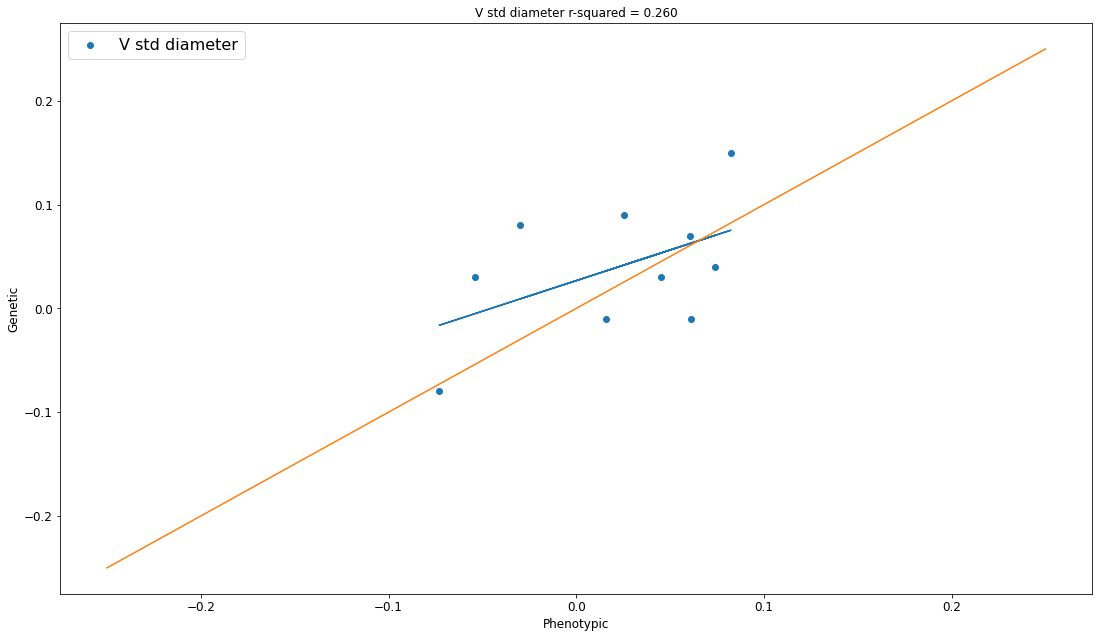

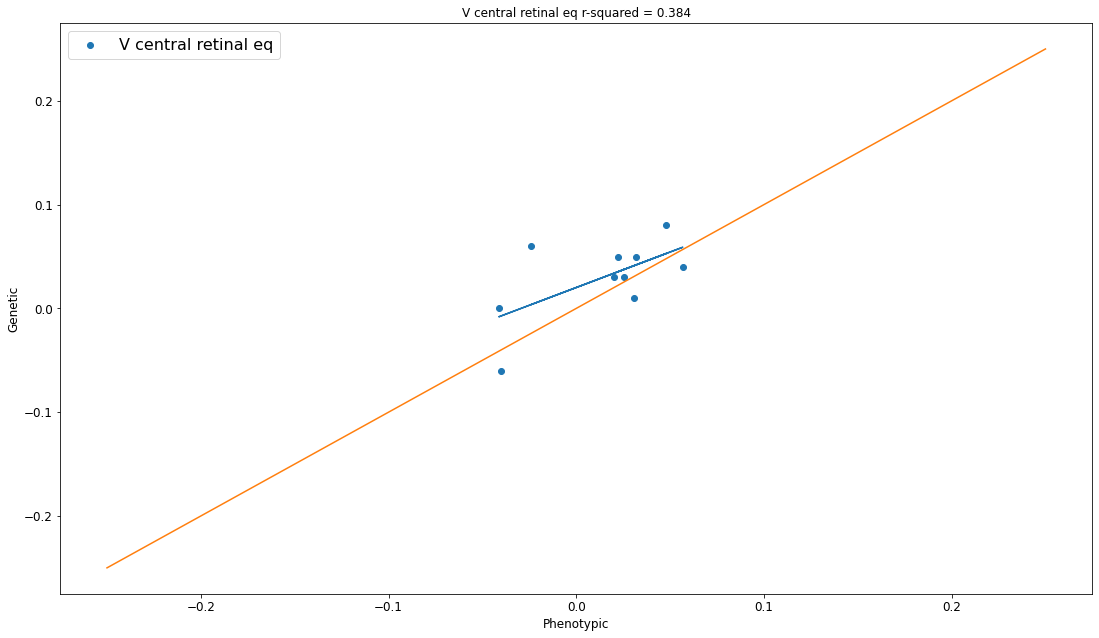

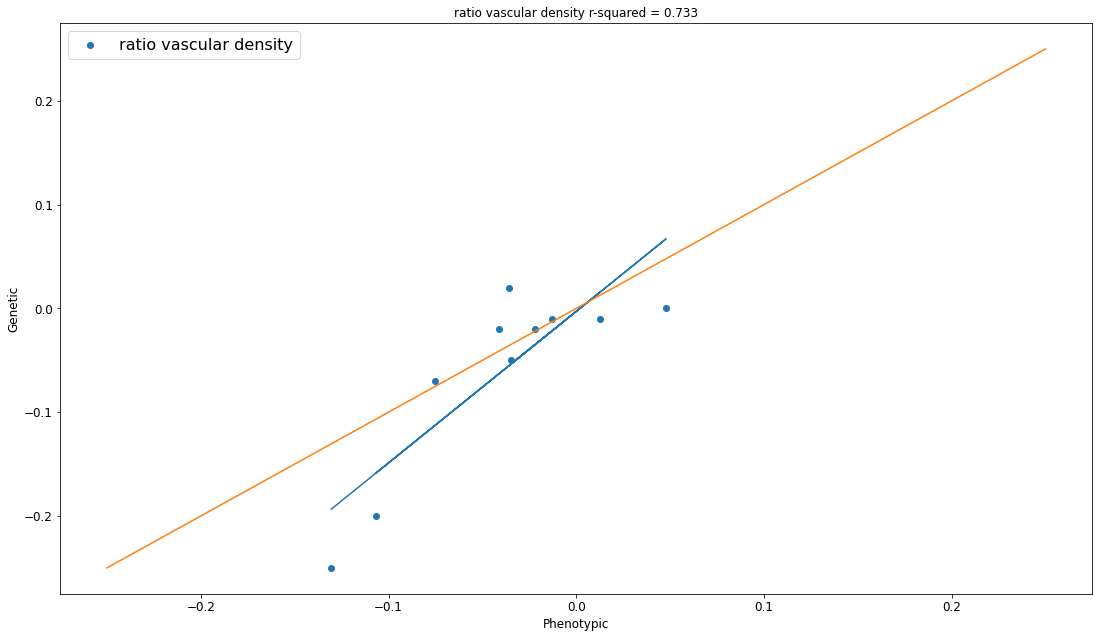

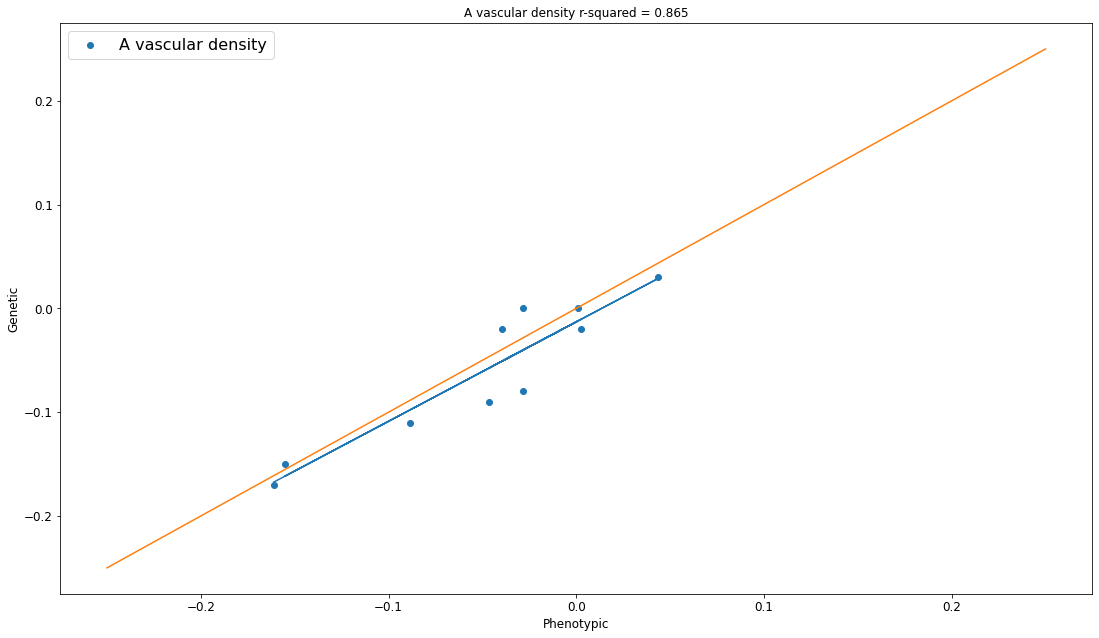

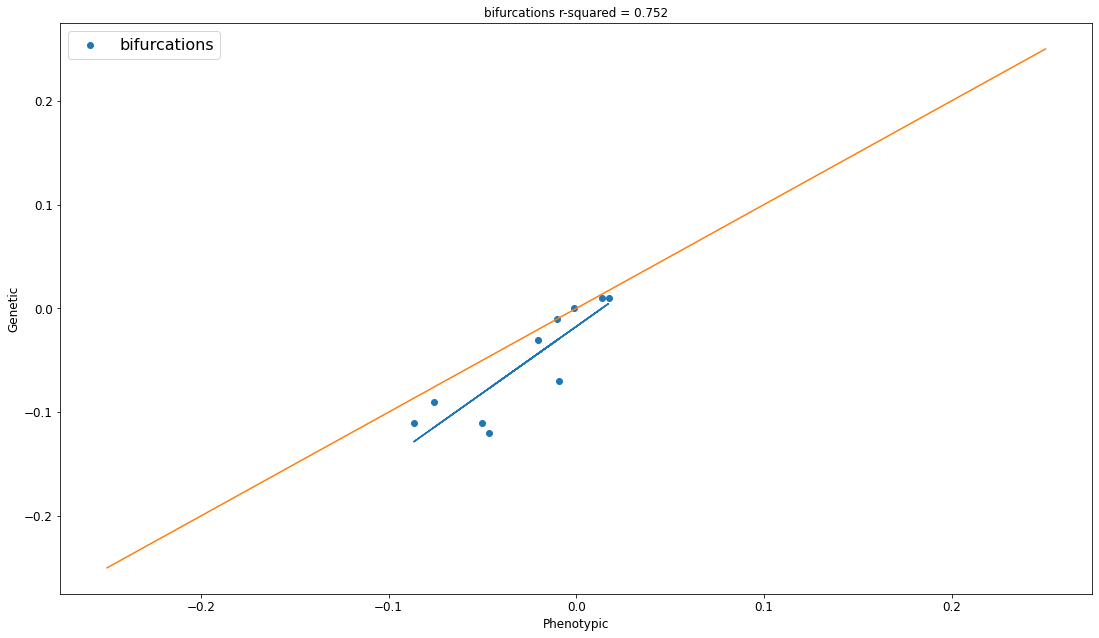

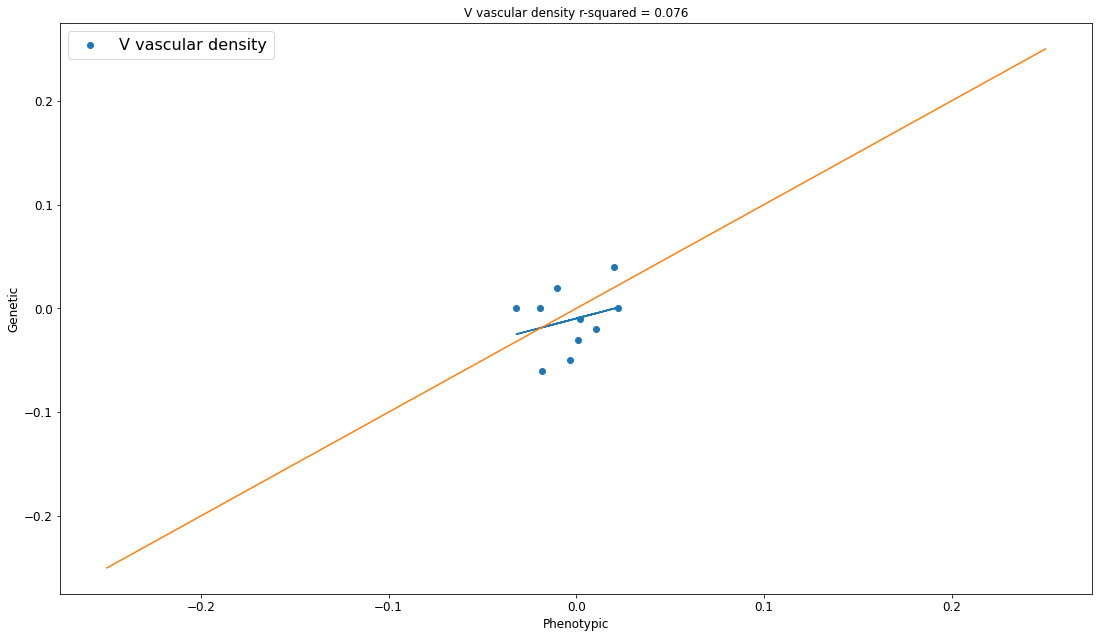

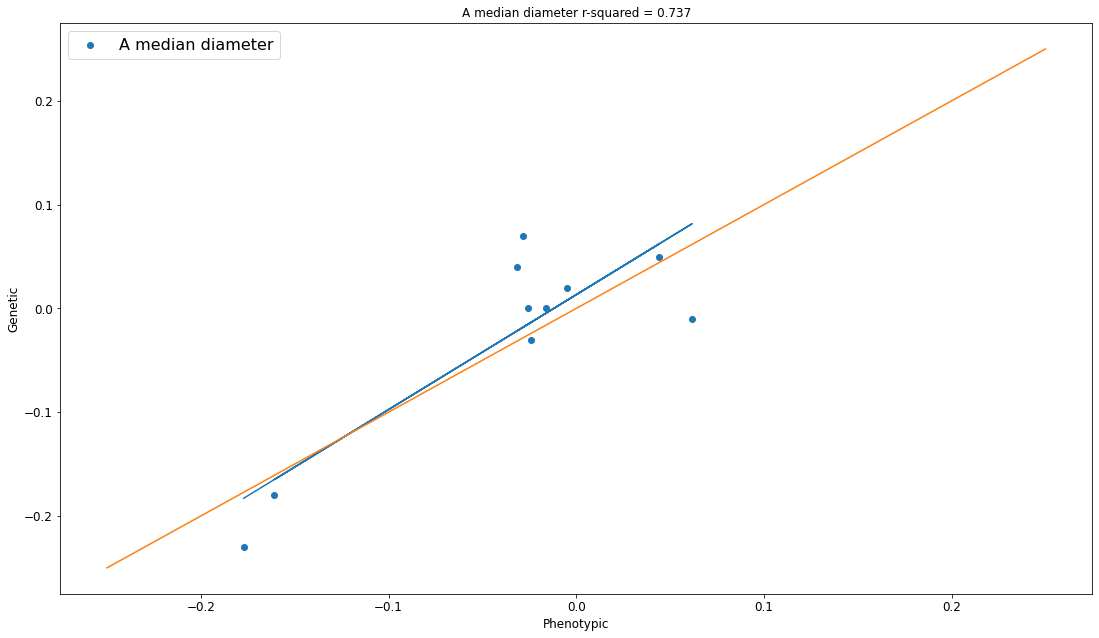

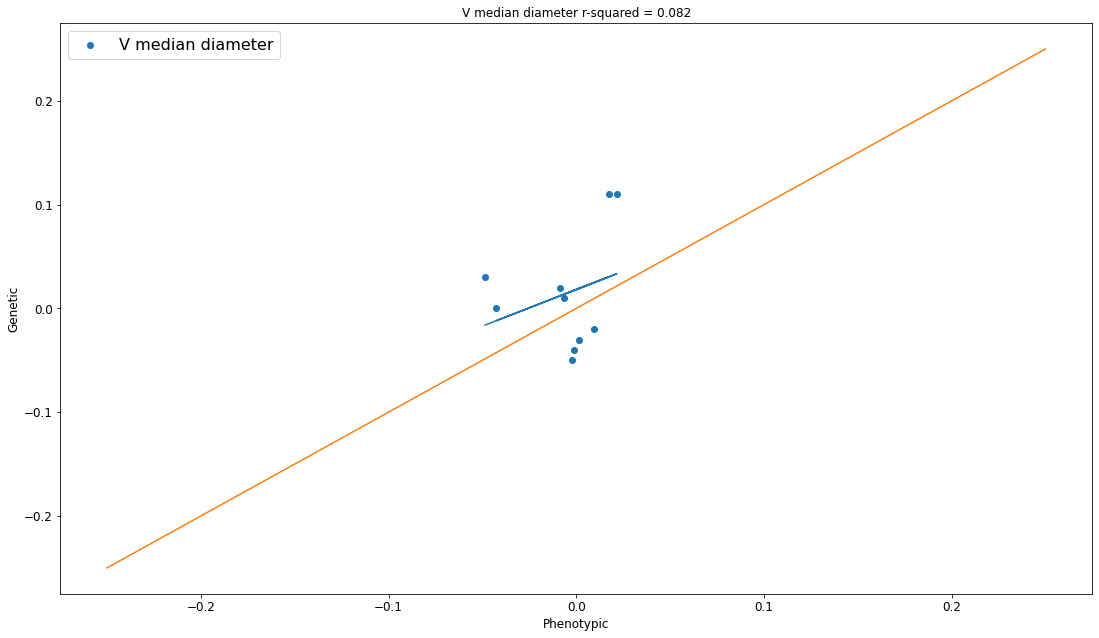

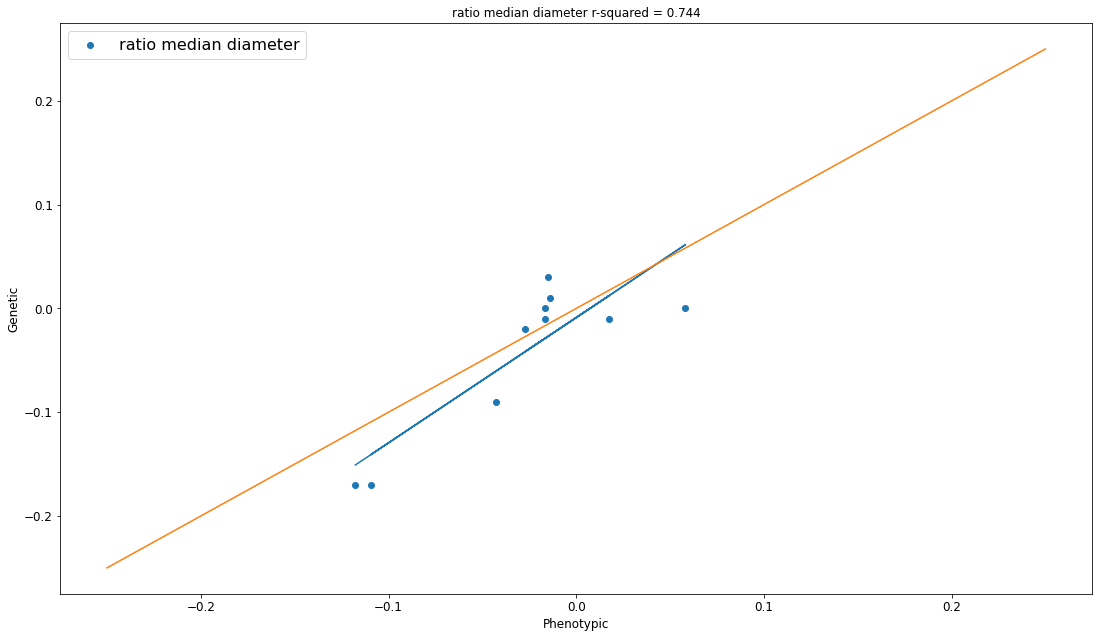

In [53]:

def phen_gen_scatter_one_at_the_time_diag_tend(df_1, df_2):
    l_aux = []
    for col in df_1.columns:
        fig = plt.gcf()
        fig.set_size_inches(18.5, 10.5)
        plt.scatter(x=df_1[col], y=df_2[col], label=col)  #, c=df_2.index, cmap="Set3")
        z = np.polyfit(np.array(df_1[col]), np.array(df_2[col]), 1)
        p = np.poly1d(z)
        #add trendline to plot
        plt.plot(np.array(df_1[col]), p(np.array(df_1[col])))
        ident = [-0.25, 0.25]
        plt.plot(ident,ident)
        r_value, r_value2 = rsquared(df_1[col], df_2[col])
        plt.legend(loc='best', fontsize=16)
        #print( col , r_value2)
        plt.xlabel('Phenotypic')
        plt.ylabel('Genetic')
        plt.title(col + " r-squared = {:.3f}".format(r_value2))
        plt.show()

        data={
            'col':  col,
            'r_value':  r_value,
            'r_value2':  r_value2
            }
        l_aux.append(data)
        
    return pd.DataFrame(l_aux)


df_continuos_R = phen_gen_scatter_one_at_the_time_diag_tend(betas_intersection, df_corr_minus_std_intersection)

df_T_continuos_R =phen_gen_scatter_one_at_the_time_diag_tend(betas_intersection.T, df_corr_minus_std_intersection.T)

In [54]:
df_continuos_R


,col,r_value,r_value2
0,DBP,0.864813,0.747902
1,BMI,0.862106,0.743226
2,HDL cholesterol,0.752713,0.566577
3,SBP,0.856676,0.733894
4,PR,0.586039,0.343442
5,Alcohol intake frequency,0.462641,0.214037
6,Triglycerides,0.080701,0.006513
7,Pulse wave ASI,0.577281,0.333253
8,HbA1c,0.822246,0.676089
9,LDL direct,-0.175924,0.030949


In [55]:
df_T_continuos_R

,col,r_value,r_value2
0,A temporal angle,0.466270,0.217408
1,V temporal angle,0.362196,0.131186
2,V tortuosity,0.368181,0.135557
3,A tortuosity,-0.075073,0.005636
4,ratio tortuosity,0.362439,0.131362
5,A central retinal eq,0.959770,0.921159
6,ratio central retinal eq,0.854712,0.730532
7,A std diameter,0.745771,0.556175
8,V std diameter,0.509700,0.259794
9,V central retinal eq,0.620022,0.384428


# Not intersection traits ('manual biyection')

In [56]:
print('ATENTION! -> Phenoty and genetically we have different sizes, we do not have biyective function between them. So it is needed to make decisions')
print('len(df_corr_minus_std) and len(betas): ', len(df_corr_minus_std), len(betas))
#print(df_corr_minus_std.index, betas.index)
list_pheno_not_geno = list(set(betas.index) - set(list_intersection_phe_gen))
list_geno_not_pheno = list(set(df_corr_minus_std.index) - set(list_intersection_phe_gen))
print('Pheno not Geno ', len(list_pheno_not_geno), ' -> names: ', list_pheno_not_geno)
print('Geno not Pheno ', len(list_geno_not_pheno), ' -> names: ', list_geno_not_pheno)


#df_corr_minus_std_geno_not_pheno = df_corr_minus_std.T[list_geno_not_pheno]
#df_corr_minus_std_geno_not_pheno.columns()

#plt.scatter(x= betas.T['Cataract'], y=df_corr_minus_std.T['Cataract *'])


ATENTION! -> Phenoty and genetically we have different sizes, we do not have biyective function between them. So it is needed to make decisions
len(df_corr_minus_std) and len(betas):  23 32
Pheno not Geno  22  -> names:  ['Atherosclerosis', 'Myopia', 'Astigmatism', "Alzheimer's disease", 'Disorders arteries arterioles', 'Presbyopia', 'Diabetes related eye disease', 'Angina', 'Stroke', 'Hypermetropia', 'High blood pressure', 'Diabetes', 'Heart attack', 'Glaucoma', 'Cataract', 'Mortality', 'Pack smoked per year', 'Amblyopia', 'N_cigarettes_curr_daily_both', 'DVT', 'Other eye diseases', 'Pulmonary embolism']
Geno not Pheno  13  -> names:  ['Smoking status: Never *', 'Glasses hypermetropia *', 'Cataract *', 'Glaucoma *', 'High blood pressure *', 'Smoking status: current *', 'Coronary atherosclerosis *', 'Glasses myopia *', 'Heart attack *', 'Stroke *', 'Smoking status: Previous *', 'Diabetes *', 'Angina *']


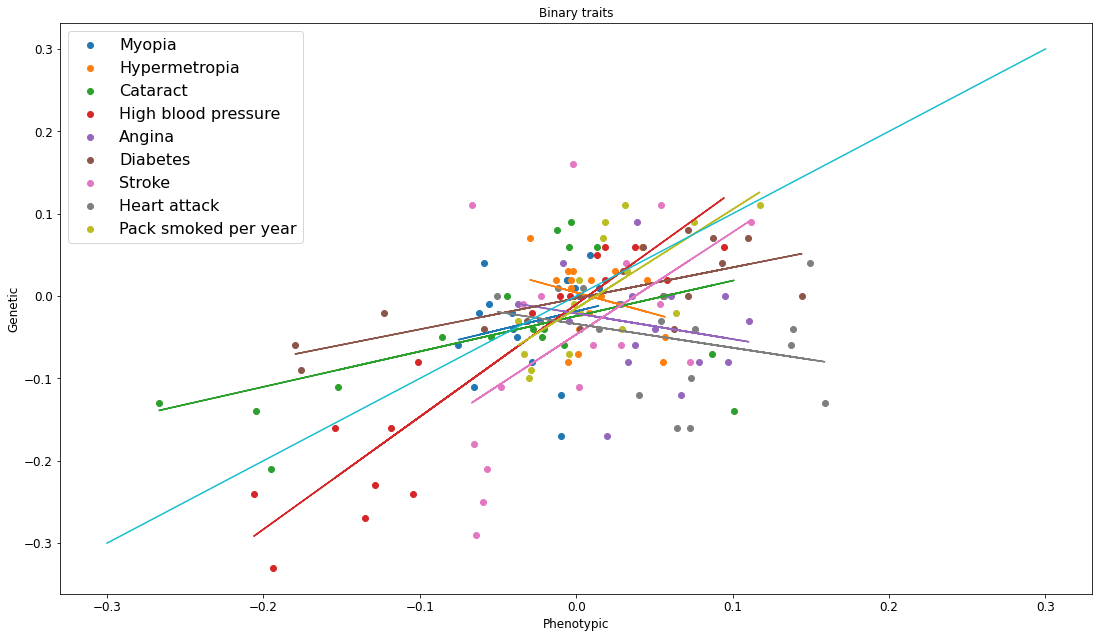

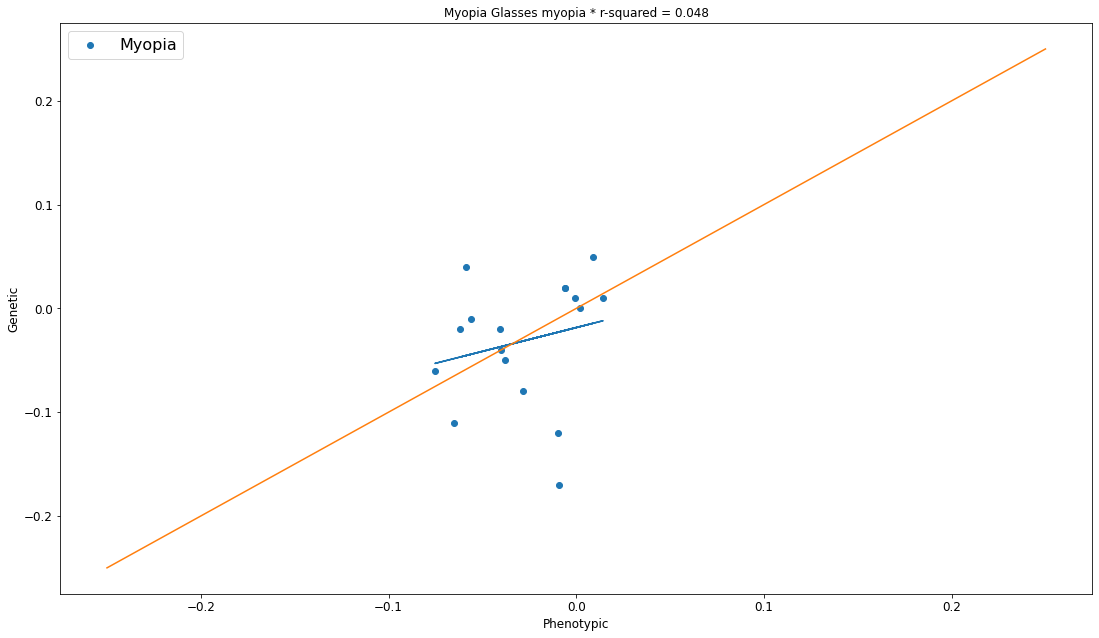

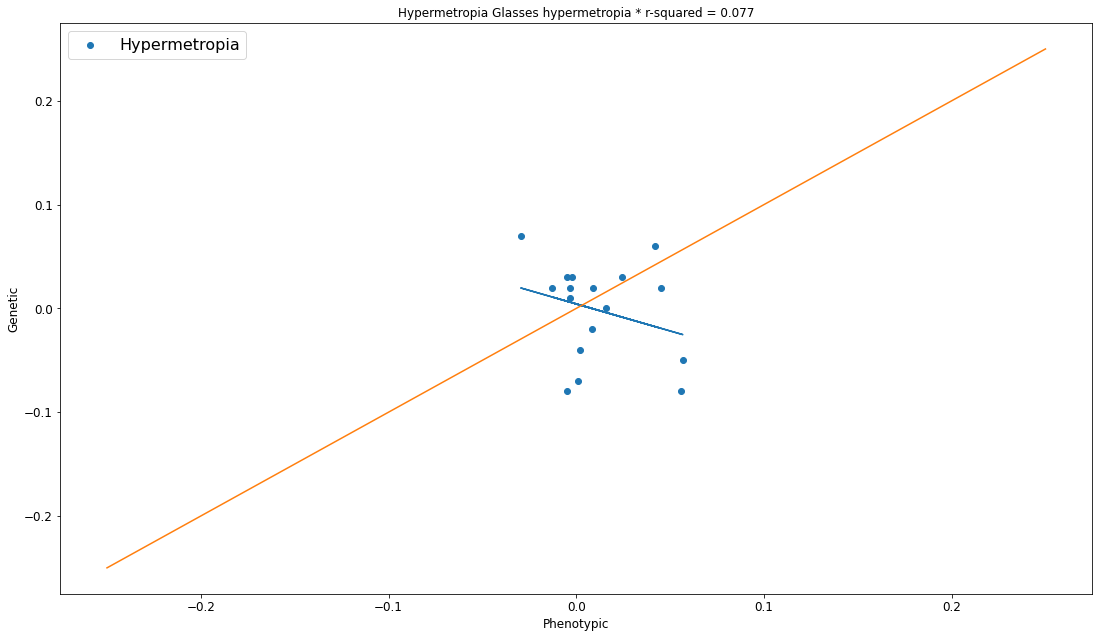

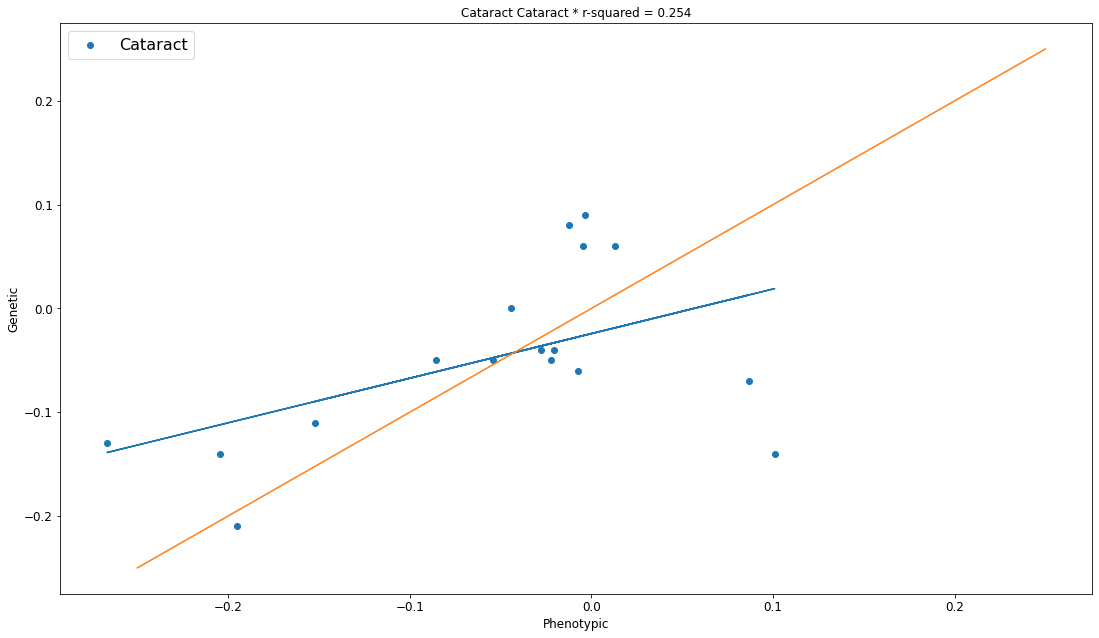

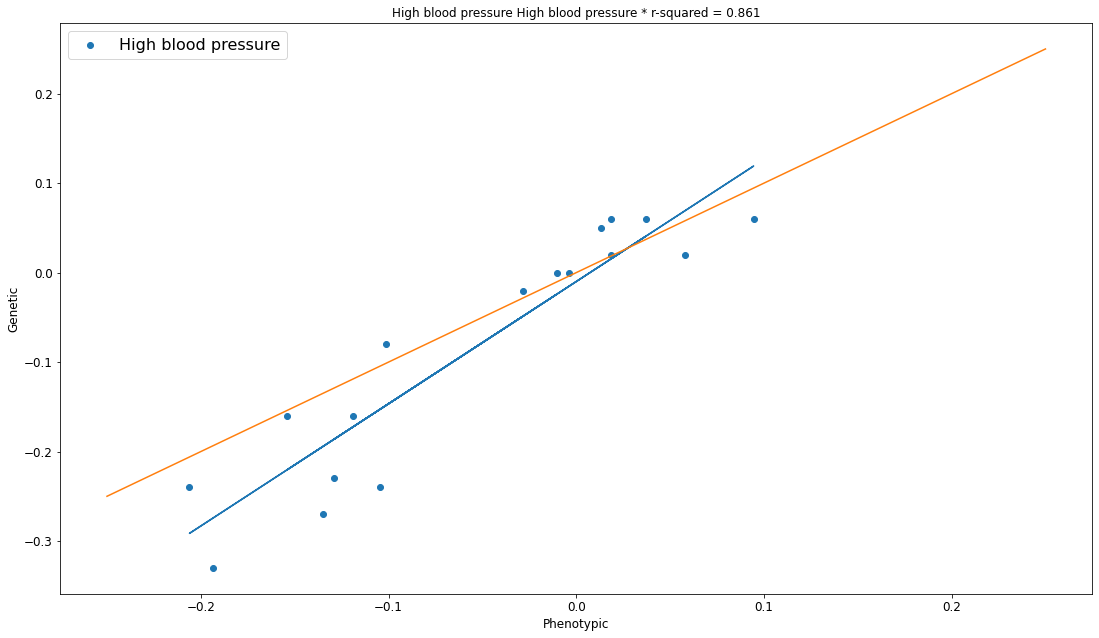

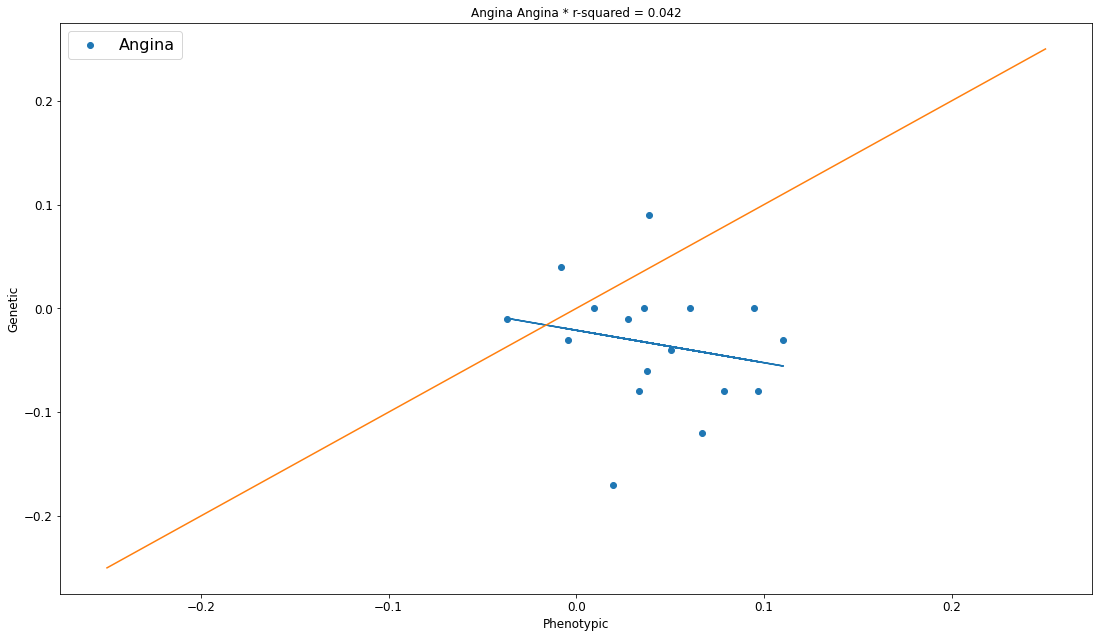

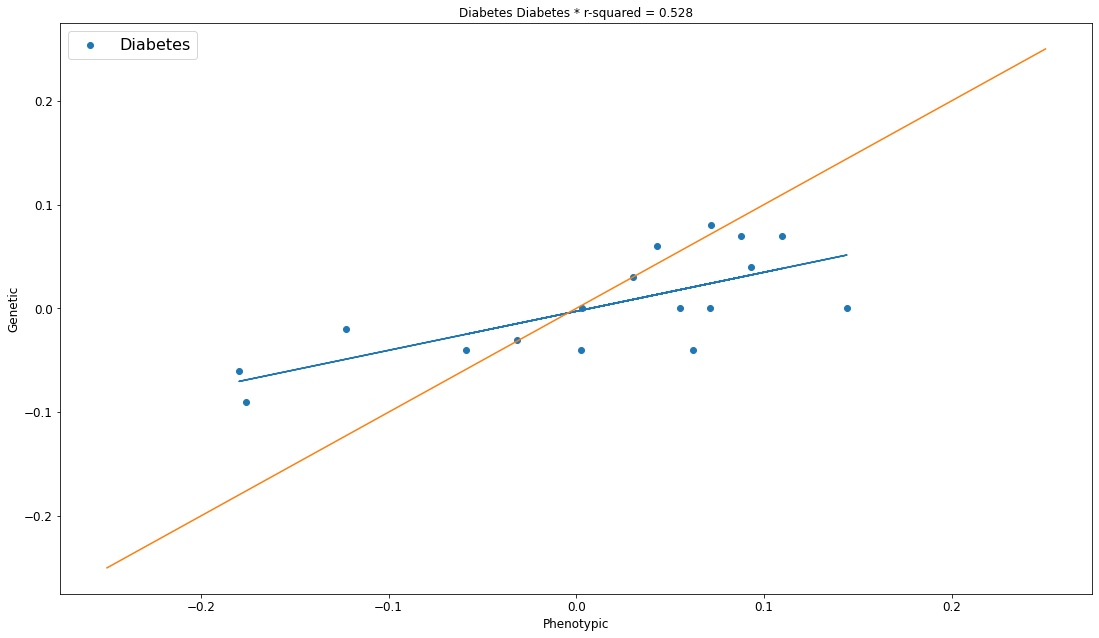

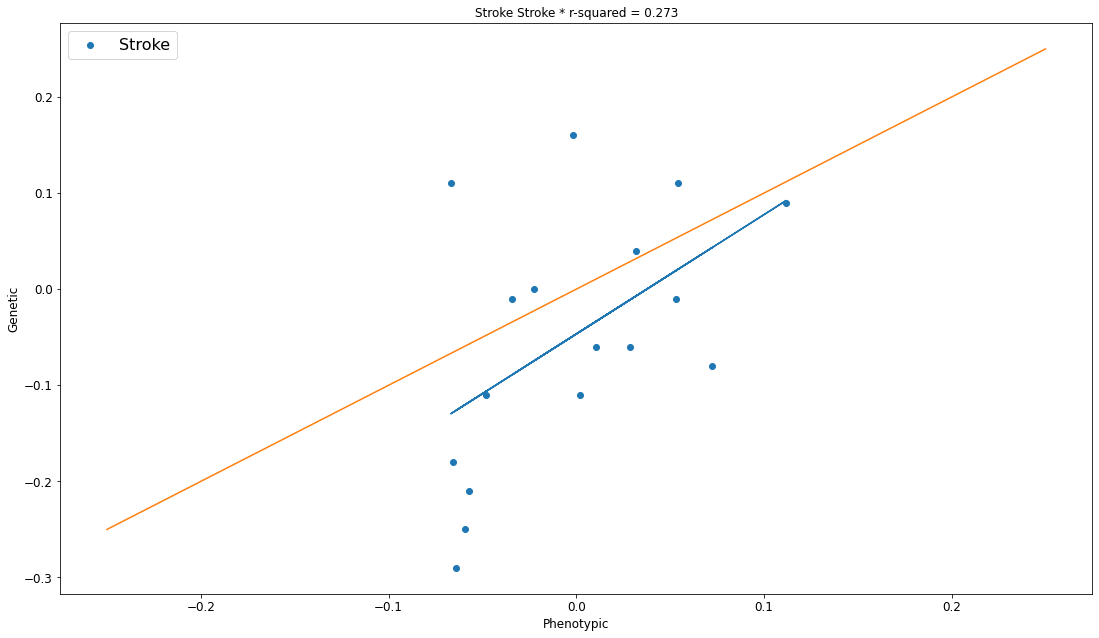

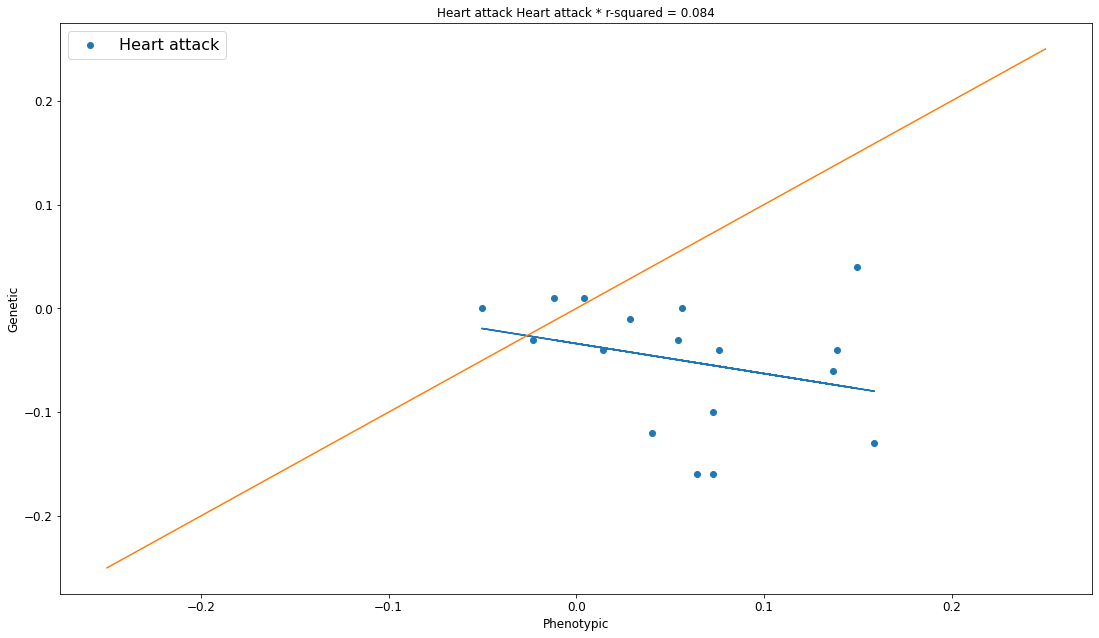

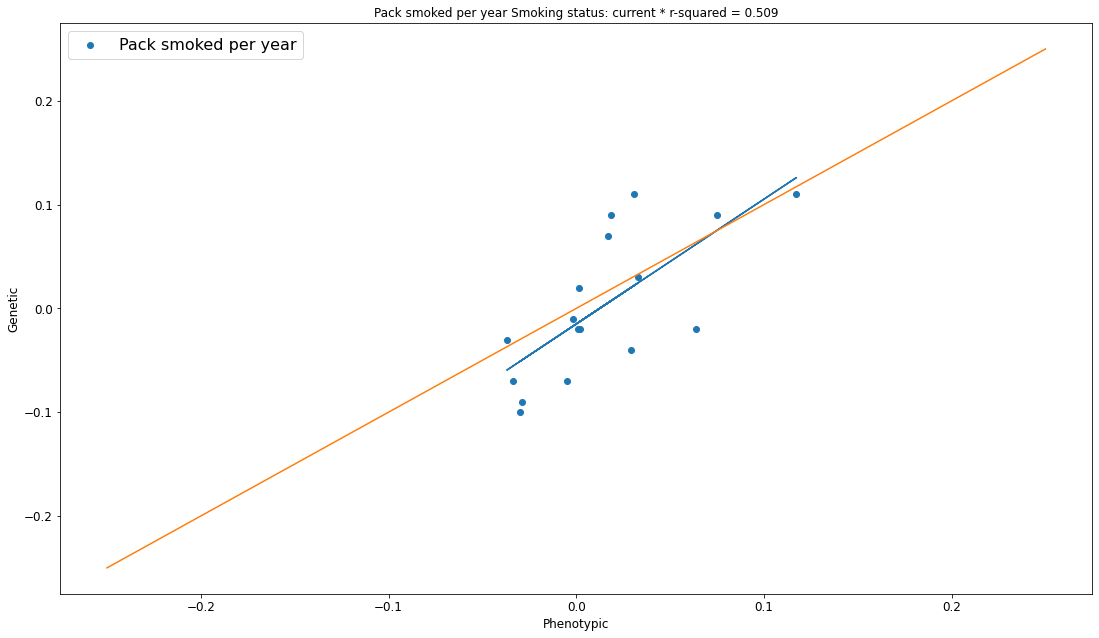

In [57]:

def binary_phen_gen_scatter_one_at_the_time_diag_tend(df_1, df_2, list_pheno_diseases, list_gen_diseases):
    counter = 0
    l_aux = []
    for col in list_pheno_diseases:
        col2 = list_gen_diseases[counter]
        fig = plt.gcf()
        fig.set_size_inches(18.5, 10.5)
        plt.scatter(x=df_1[col], y=df_2[col2], label=col)  #, c=df_2.index, cmap="Set3")
        z = np.polyfit(np.array(df_1[col]), np.array(df_2[col2]), 1)
        p = np.poly1d(z)
        #add trendline to plot
        plt.plot(np.array(df_1[col]), p(np.array(df_1[col])))
        ident = [-0.25, 0.25]
        plt.plot(ident,ident)
        r_value, r_value2 = rsquared(df_1[col], df_2[col2])
        plt.legend(loc='best', fontsize=16)
        #print( col , r_value2)
        plt.xlabel('Phenotypic')
        plt.ylabel('Genetic')
        plt.title(col + ' '+ col2 + " r-squared = {:.3f}".format(r_value2))
        plt.show()
        counter= counter + 1

        data={
            'col':  col,
            'r_value':  r_value,
            'r_value2':  r_value2
            }
        l_aux.append(data)
        
    return pd.DataFrame(l_aux)




def binary_phen_gen_scatter_diag_tend(df_1, df_2, list_pheno_diseases, list_gen_diseases):
    counter = 0
    for col in list_pheno_diseases:
        col2 = list_gen_diseases[counter]
        fig = plt.gcf()
        fig.set_size_inches(18.5, 10.5)
        plt.scatter(x=df_1[col], y=df_2[col2], label=col)  #, c=df_2.index, cmap="Set3")
        plt.legend(loc='best', fontsize=16)
        z = np.polyfit(np.array(df_1[col]), np.array(df_2[col2]), 1)
        p = np.poly1d(z)
        #add trendline to plot
        plt.plot(np.array(df_1[col]), p(np.array(df_1[col])))
        counter= counter + 1
    ident = [-0.3, 0.3]
    plt.plot(ident,ident)
    plt.xlabel('Phenotypic')
    plt.ylabel('Genetic')
    plt.title('Binary traits')
    plt.show()


list_pheno_diseases = ['Myopia', 'Hypermetropia', 'Cataract', 'High blood pressure', 'Angina', 'Diabetes', 'Stroke', 'Heart attack', 'Pack smoked per year']
list_gen_diseases = ['Glasses myopia *', 'Glasses hypermetropia *', 'Cataract *', 'High blood pressure *', 'Angina *', 'Diabetes *','Stroke *', 'Heart attack *', 'Smoking status: current *']

#phen_gen_scatter_one_at_the_time_diag_tend(betas_intersection, df_corr_minus_std_intersection, list_pheno_diseases, list_gen_diseases)

binary_phen_gen_scatter_diag_tend(betas.T, df_geno_used_binary, list_pheno_diseases, list_gen_diseases )
df_binary_R= binary_phen_gen_scatter_one_at_the_time_diag_tend(betas.T, df_geno_used_binary, list_pheno_diseases, list_gen_diseases)



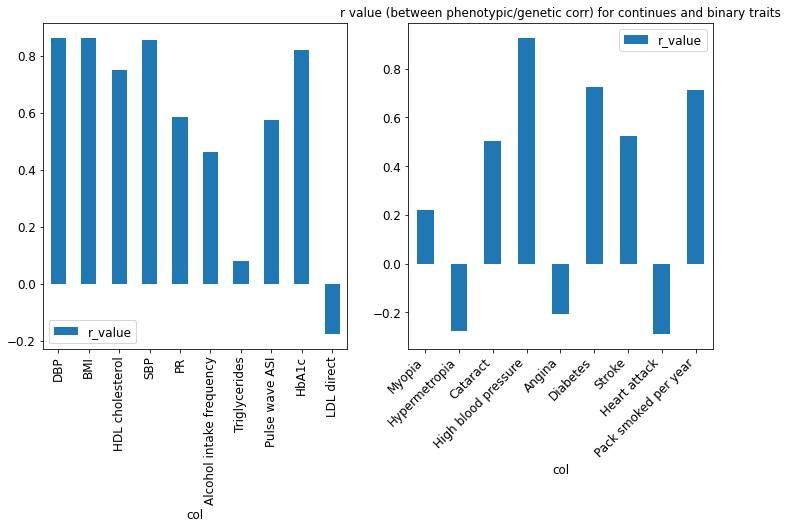

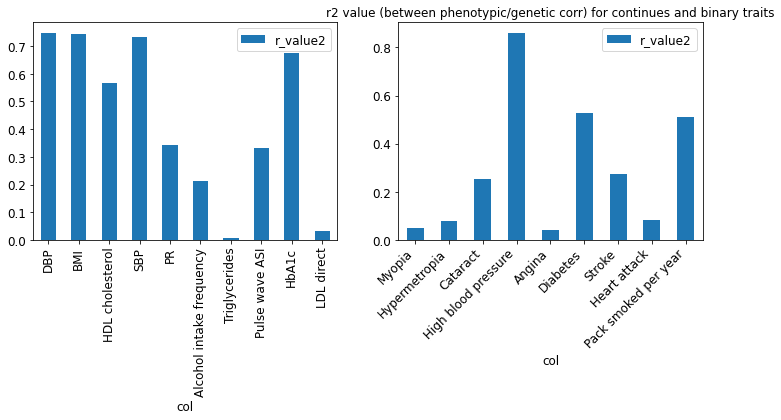

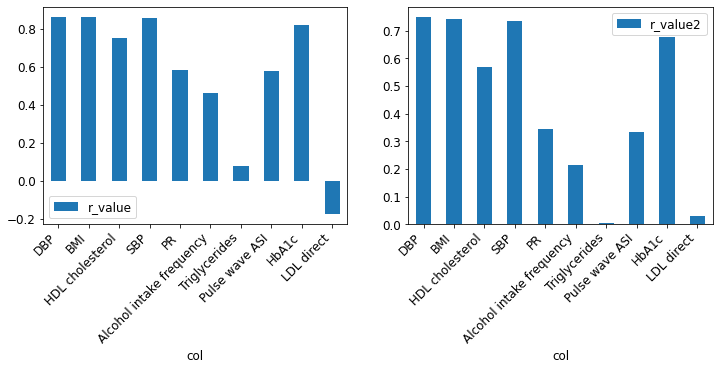

In [30]:
#df_continuos_R.plot.bar(y='r_value', x='col')
#df_continuos_R.plot.bar(y='r_value2', x='col')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
df_continuos_R.plot.bar(y='r_value', x='col', ax=ax1)
plt.xticks(rotation=45, ha='right')
df_binary_R.plot.bar(y='r_value', x='col',ax=ax2)
plt.xticks(rotation=45, ha='right')
plt.title('r value (between phenotypic/genetic corr) for continues and binary traits')
plt.show()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
df_continuos_R.plot.bar(y='r_value2', x='col', ax=ax1)
plt.xticks(rotation=45, ha='right')
df_binary_R.plot.bar(y='r_value2', x='col',ax=ax2)
plt.xticks(rotation=45, ha='right')
plt.title('r2 value (between phenotypic/genetic corr) for continues and binary traits')
plt.show()


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
df_continuos_R.plot.bar(y='r_value', x='col', ax=ax1)
xlabels1 = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels1, rotation=45,  ha='right')
df_continuos_R.plot.bar(y='r_value2', x='col', ax=ax2)
xlabels2 = ax2.get_xticklabels()
ax2.set_xticklabels(xlabels2, rotation=45,  ha='right')
#plt.title('r and r2 value (between phenotypic/genetic corr) for continues traits')
plt.show()




### From the 1st figures: Phenotypic and genetic correlations have a possitive slope expcet for 'LDL direct' (continuos), 'hypermetroypia', 'angina', and 'heart attack' (binary)
### From the 3rd figures: Except for tortuosity all the others seem to have higher r2 for the Arteries than for the veins

In [1]:
df_continuos_R.plot.bar(y='r_value', x='col')
plt.xticks(rotation=45, ha='right')
plt.show()

df_T_continuos_R.plot.bar(y='r_value', x='col')
plt.xticks(rotation=45, ha='right')
#plt.title('Vascular traits: r and r2 value (between phenotypic/genetic corr) for continues traits')
plt.show()

NameError: name 'df_continuos_R' is not defined